## Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import the Dataset

In [2]:
df = pd.read_csv('Cars.csv')

#### Top rows

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


#### Basic Dataset Information (EDA)

##### Shape of Dataset

In [4]:
df.shape

(5961, 15)

* Dataset contains rows = 5961
* Columns = 15

##### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


* Mix of numerical (33.3%) + categorical colums (66.7%)
* Missing values present
* New_Price needs special treatment or removal (86.2% missing)

##### Statistical Summary

In [6]:
df.describe()


,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.000000,5.953000e+03,5956.000000,5960.000000,5961.000000
mean,2013.389159,5.871110e+04,5.269140,4.114933,9.528103
std,3.243051,9.171221e+04,0.789048,0.344757,11.214382
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000
25%,2011.500000,3.393100e+04,5.000000,4.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000


* Vehicles are largely structurally uniform, dominated by 5-seater, 4-door cars, as shown by very low variation in seats and doors.
* Car prices are right-skewed, with a median of ₹5.66 lakhs and a wide range (₹0.44–₹160 lakhs), indicating the presence of premium outliers.

##### Check for Duplicate Rows (EEDA - DATA QUALITY CHECK STEP)

In [7]:
df.duplicated().sum()


np.int64(1)

##### Remove duplicate rows

In [8]:
df.drop_duplicates(inplace=True)

##### Feature Extraction: Separating Value and Unit Components(EDA - Feature Engineering)

In [9]:
df[['Mileage_Value','Mileage_Unit']]=df['Mileage'].str.split(' ',expand = True)
df[['Power_Value','Power_Unit']]=df['Power'].str.split(' ',expand = True)
df[['Engine_Value','Engine_Unit']]=df['Engine'].str.split(' ',expand = True)

###### After splitting, the original columns Mileage, Engine, and Power are dropped to avoid redundancy and ensure a clean, analysis-ready dataset.

In [10]:
df.drop(columns = ['Mileage', 'Engine', 'Power'],inplace = True)

###### Splitting Company and Model Names


In [11]:
df[['Company_Name','Model_Name']]=df['Name'].str.rsplit(n = 1,expand  =True)
df.drop(columns = ['Name'],inplace = True)

In [12]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,New_Price,Price,Mileage_Value,Mileage_Unit,Power_Value,Power_Unit,Engine_Value,Engine_Unit,Company_Name,Model_Name
0,Pune,2012.0,99000.0,Diesel,Manual,Third,Black/Silver,8.0,5.0,NaN,6.00,12.05,kmpl,120,bhp,2179,CC,Mahindra,Scorpio
1,Kochi,2018.0,18678.0,Petrol,Manual,First,Others,5.0,4.0,NaN,8.32,21.1,kmpl,100,bhp,998,CC,Maruti,Baleno
2,Bangalore,2013.0,197000.0,Diesel,Manual,First,White,7.0,5.0,NaN,4.00,11.68,kmpl,112,bhp,2498,CC,Mahindra,Xylo
3,Delhi,2014.0,45000.0,Diesel,Manual,First,White,5.0,4.0,NaN,3.49,24.0,kmpl,70,bhp,1120,CC,Hyundai,Grand
4,Delhi,2011.0,65000.0,Diesel,Manual,First,Others,8.0,5.0,NaN,6.40,12.8,kmpl,102,bhp,2494,CC,Toyota,Innova


##### Check Data types

In [13]:
df.dtypes

Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Colour                object
Seats                float64
No. of Doors         float64
New_Price             object
Price                float64
Mileage_Value         object
Mileage_Unit          object
Power_Value           object
Power_Unit            object
Engine_Value          object
Engine_Unit           object
Company_Name          object
Model_Name            object
dtype: object

##### Converting Extracted Value Columns to Float

In [14]:
df['Mileage_Value'] = df['Mileage_Value'].astype(float)
df['Engine_Value'] = df['Engine_Value'].astype(float)

In [15]:
df['Power_Value']= pd.to_numeric(df['Power_Value'],errors = 'coerce')

* The column Power_Value contains some entries with the string 'null', so we cannot convert it directly using astype(float); instead, we use pd.to_numeric with errors='coerce' to convert valid numeric values to float and turn 'null' strings into NaN.

##### Check Missing Values

In [16]:
df.isnull().sum().sort_values(ascending=False)


New_Price            5136
Power_Value           135
Power_Unit             32
Transmission           27
Engine_Value           17
Engine_Unit            17
Owner_Type             15
Location               11
Colour                 11
Kilometers_Driven       8
Seats                   5
Year                    2
Mileage_Value           2
Mileage_Unit            2
No. of Doors            1
Price                   0
Fuel_Type               0
Company_Name            0
Model_Name              0
dtype: int64

###### Dropping New_Price Due to Excessive Missing Values (more than 85 %)

In [17]:
df.drop(columns = ['New_Price'],inplace = True)

In [18]:
df.isnull().sum().sort_values(ascending=False)

Power_Value          135
Power_Unit            32
Transmission          27
Engine_Unit           17
Engine_Value          17
Owner_Type            15
Colour                11
Location              11
Kilometers_Driven      8
Seats                  5
Year                   2
Mileage_Value          2
Mileage_Unit           2
No. of Doors           1
Price                  0
Fuel_Type              0
Company_Name           0
Model_Name             0
dtype: int64

#### Handling Missing values

##### For categorical columns

In [19]:
cat_columns = ['Location','Year','Transmission','Owner_Type', 'Colour', 'Seats',
               'No. of Doors','Mileage_Unit','Power_Unit','Engine_Unit']
cat_columns

['Location',
 'Year',
 'Transmission',
 'Owner_Type',
 'Colour',
 'Seats',
 'No. of Doors',
 'Mileage_Unit',
 'Power_Unit',
 'Engine_Unit']

In [20]:
for i in df.columns:
    if i in cat_columns:
        df[i].fillna(df[i].mode()[0],inplace=True)

##### For Numerical columns

In [21]:
num_columns = ['Kilometers_Driven', 'Power_Value', 'Engine_Value']

##### Checking for the outliers before fill null values

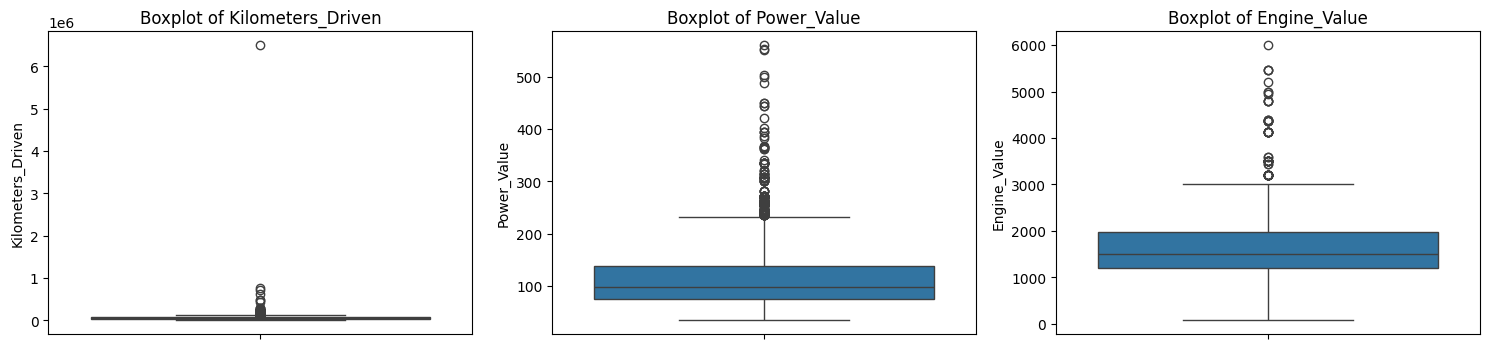

In [22]:
plt.figure(figsize=(15,10))
pos = 1
for i in (num_columns):
    plt.subplot(3, 3, pos)
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot of {i}')
    pos+=1
plt.tight_layout()
plt.show()

* All three columns — Kilometers_Driven, Power_Value, and Engine_Value — have outliers, so we will fill their missing values using the median.


In [23]:
for i in num_columns:
    df[i].fillna(df[i].median(),inplace=True)

###### For Mileage, we will fill missing values with the median corresponding to each Mileage_Unit, since different units may have different scales.

In [24]:
df['Mileage_Unit'][df['Mileage_Value'].isnull()]

4027    kmpl
5242    kmpl
Name: Mileage_Unit, dtype: object

In [25]:
median_kmpl = df['Mileage_Value'][df['Mileage_Unit']=='kmpl'].median()
median_kmpl

np.float64(18.15)

In [26]:
df['Mileage_Value'].fillna(median_kmpl,inplace=True)

##### Check for the missing values again

In [27]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Colour               0
Seats                0
No. of Doors         0
Price                0
Mileage_Value        0
Mileage_Unit         0
Power_Value          0
Power_Unit           0
Engine_Value         0
Engine_Unit          0
Company_Name         0
Model_Name           0
dtype: int64

All missing values in the dataset have been successfully filled, so there are now no nulls remaining in any column.

## Univariate Analysis (EDA- Visualization)

In [28]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Price,Mileage_Value,Mileage_Unit,Power_Value,Power_Unit,Engine_Value,Engine_Unit,Company_Name,Model_Name
0,Pune,2012.0,99000.0,Diesel,Manual,Third,Black/Silver,8.0,5.0,6.00,12.05,kmpl,120.0,bhp,2179.0,CC,Mahindra,Scorpio
1,Kochi,2018.0,18678.0,Petrol,Manual,First,Others,5.0,4.0,8.32,21.10,kmpl,100.0,bhp,998.0,CC,Maruti,Baleno
2,Bangalore,2013.0,197000.0,Diesel,Manual,First,White,7.0,5.0,4.00,11.68,kmpl,112.0,bhp,2498.0,CC,Mahindra,Xylo
3,Delhi,2014.0,45000.0,Diesel,Manual,First,White,5.0,4.0,3.49,24.00,kmpl,70.0,bhp,1120.0,CC,Hyundai,Grand
4,Delhi,2011.0,65000.0,Diesel,Manual,First,Others,8.0,5.0,6.40,12.80,kmpl,102.0,bhp,2494.0,CC,Toyota,Innova


### Numerical Columns

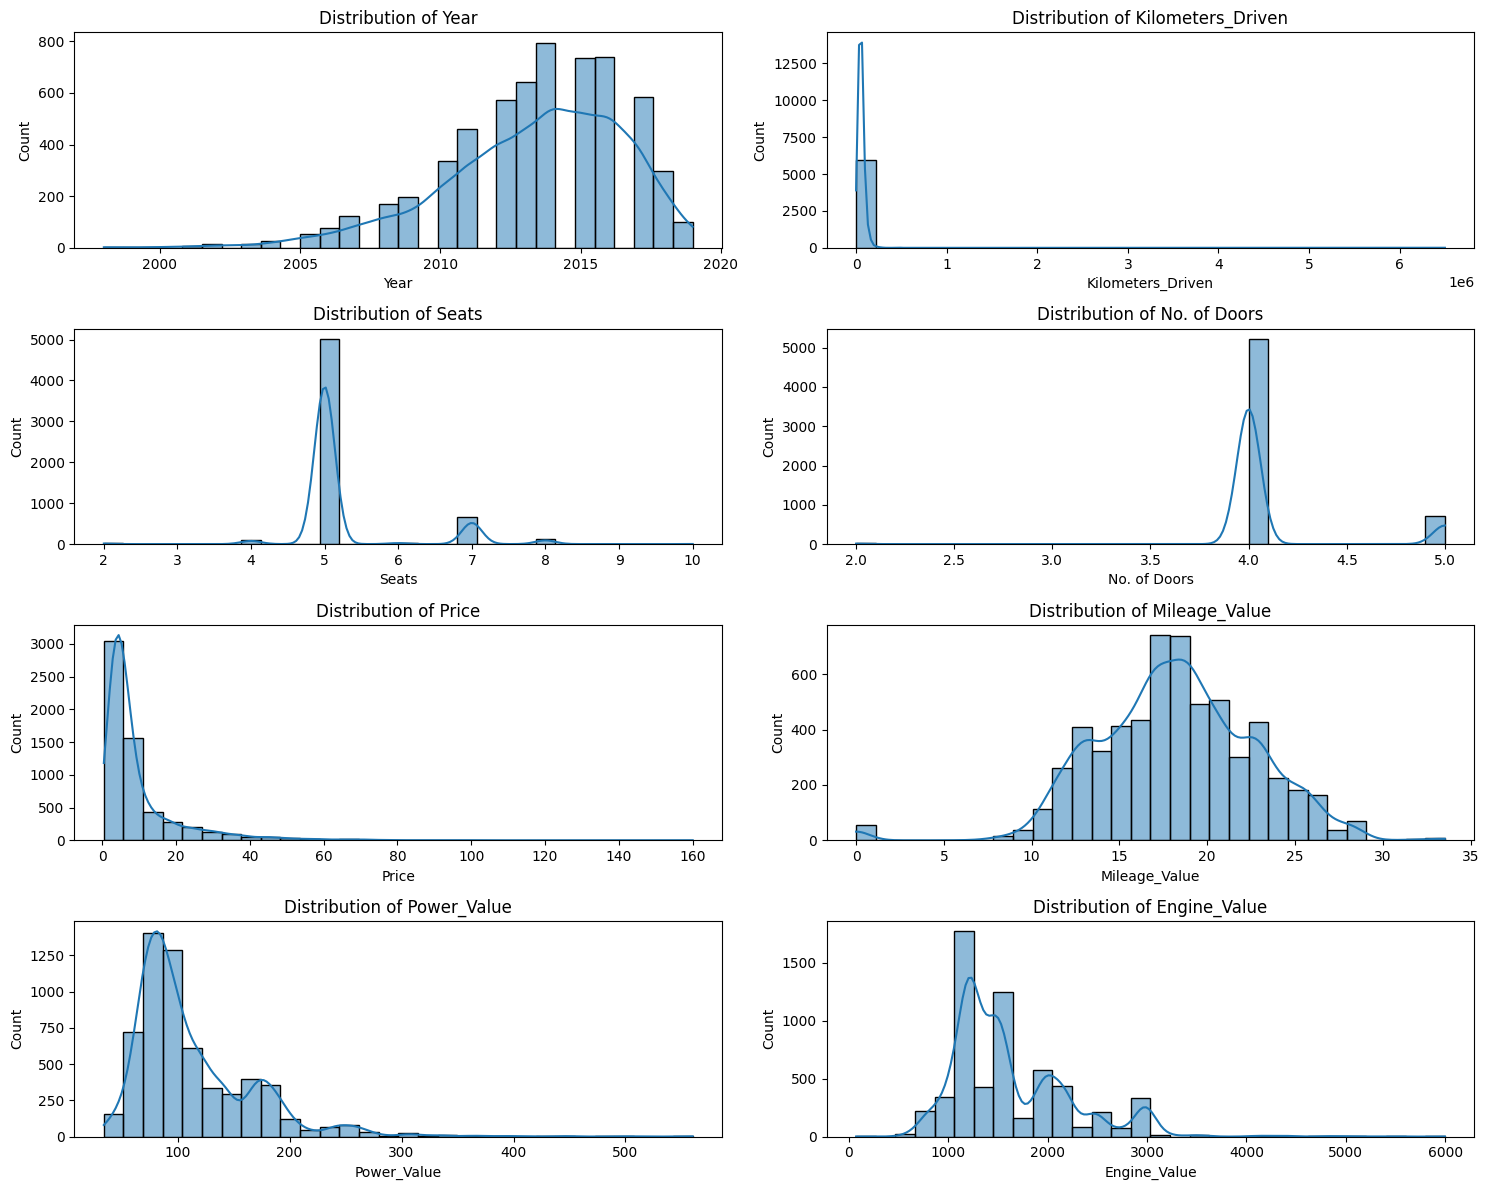

In [29]:
num_cols = ['Year', 'Kilometers_Driven', 'Seats', 'No. of Doors', 'Price', 'Mileage_Value', 'Power_Value', 'Engine_Value']
plt.figure(figsize=(15,12))
pos = 1
for col in num_cols:
    plt.subplot(4,2,pos)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    pos+=1
plt.tight_layout()
plt.show()


* Year: Most cars manufactured after 2010, some older models still present.
* Kilometers_Driven: Right-skewed; few high-mileage cars.
* Seats: Mostly 5-seaters, some 7–8 seater SUVs.
* No. of Doors: 4-door cars dominate.
* Price: Right-skewed, outliers in luxury cars.
* Mileage_Value: Normal distribution around 15–20 kmpl.
* Power_Value: Some high-power vehicles (luxury/premium cars).
* Engine_Value: Mostly small engines (1000–2000cc), some large SUVs.

### Categorical Columns

In [30]:
cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Colour', 'Company_Name', 'Model_Name']
cat_cols

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Colour',
 'Company_Name',
 'Model_Name']

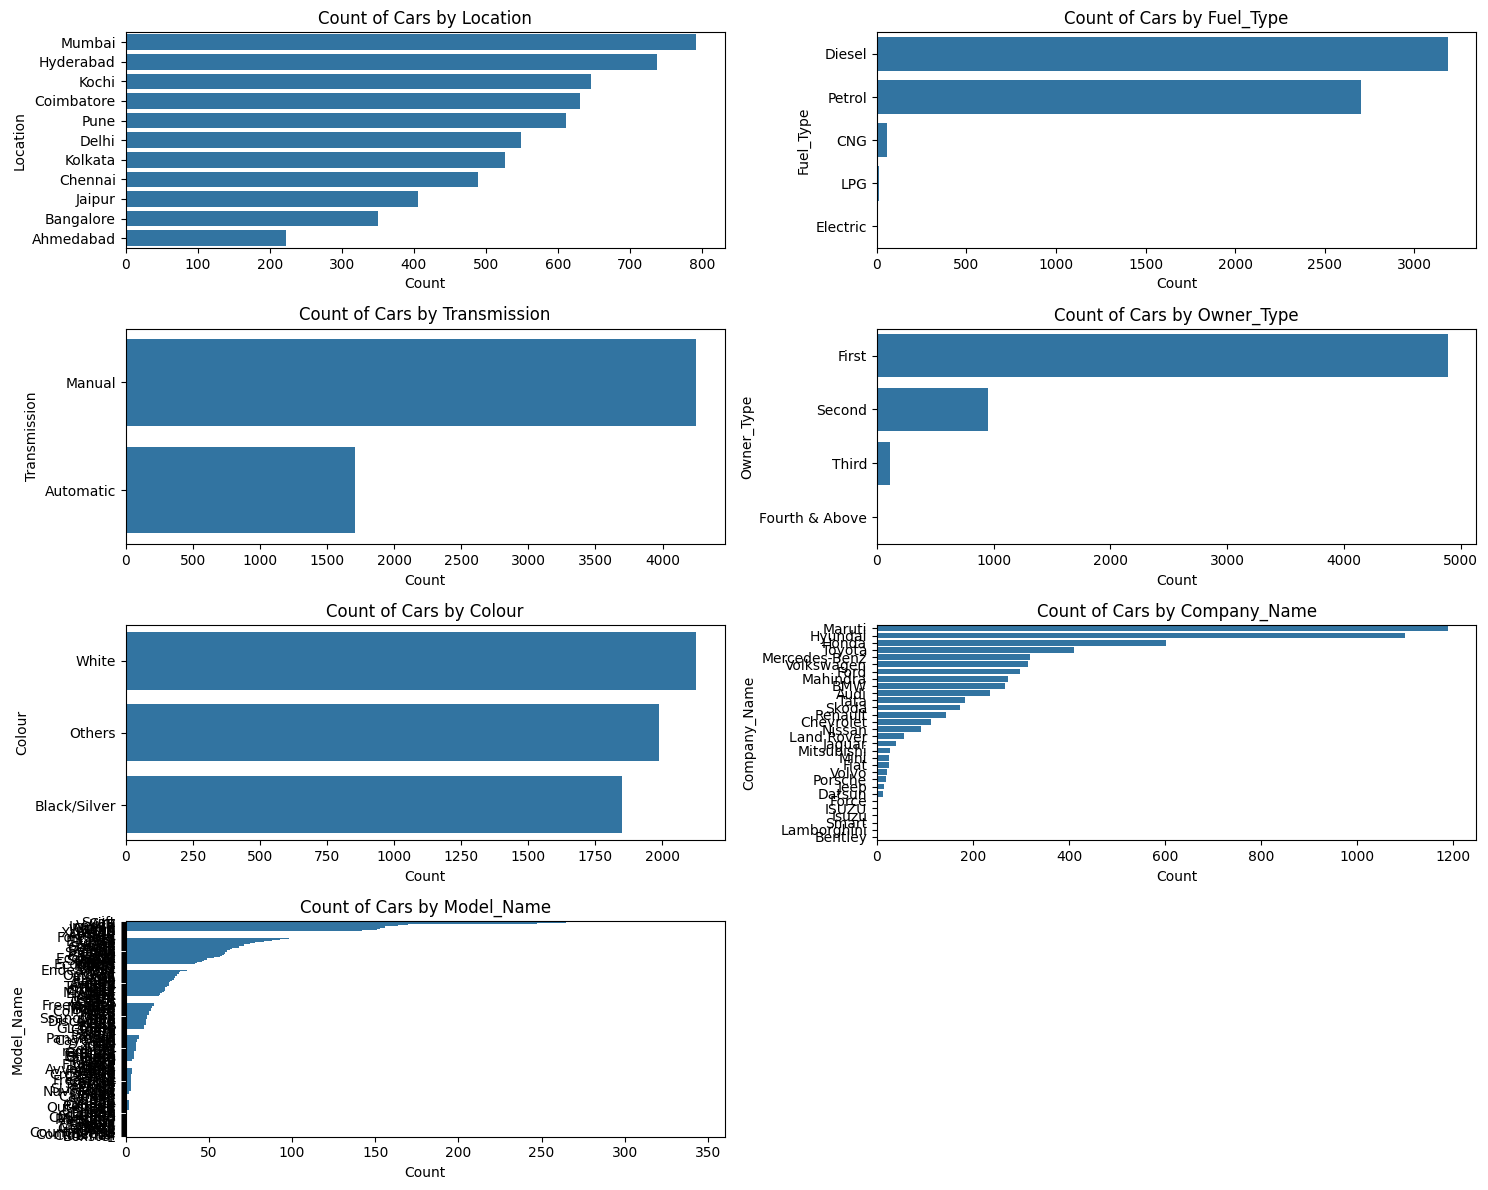

In [31]:
plt.figure(figsize=(15,12))
pos = 1
for col in cat_cols:
    plt.subplot(4,2,pos)
    pos+=1
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of Cars by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


* Location: Most cars from metropolitan cities like Delhi, Bangalore, Pune.
* Fuel_Type: Diesel & Petrol dominate.
* Transmission: Manual dominates; automatic cars are fewer.
* Owner_Type: First owners dominate dataset.
* Colour: White, Black, Silver most common.
* Company_Name: Popular brands like Maruti, Hyundai, Mahindra dominate.
* Model_Name: Each model appears fewer times; long-tail distribution.


### Bivariate Analysis (Relationship between two features)

#### Numerical vs Numerical

##### Correlation Matrix

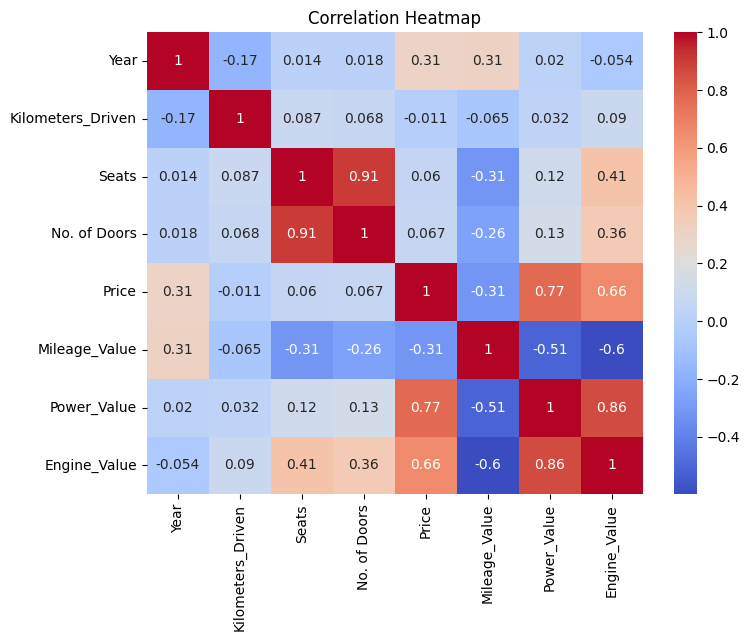

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Year','Kilometers_Driven','Seats','No. of Doors','Price','Mileage_Value','Power_Value','Engine_Value']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### Pairwise Scatterplots

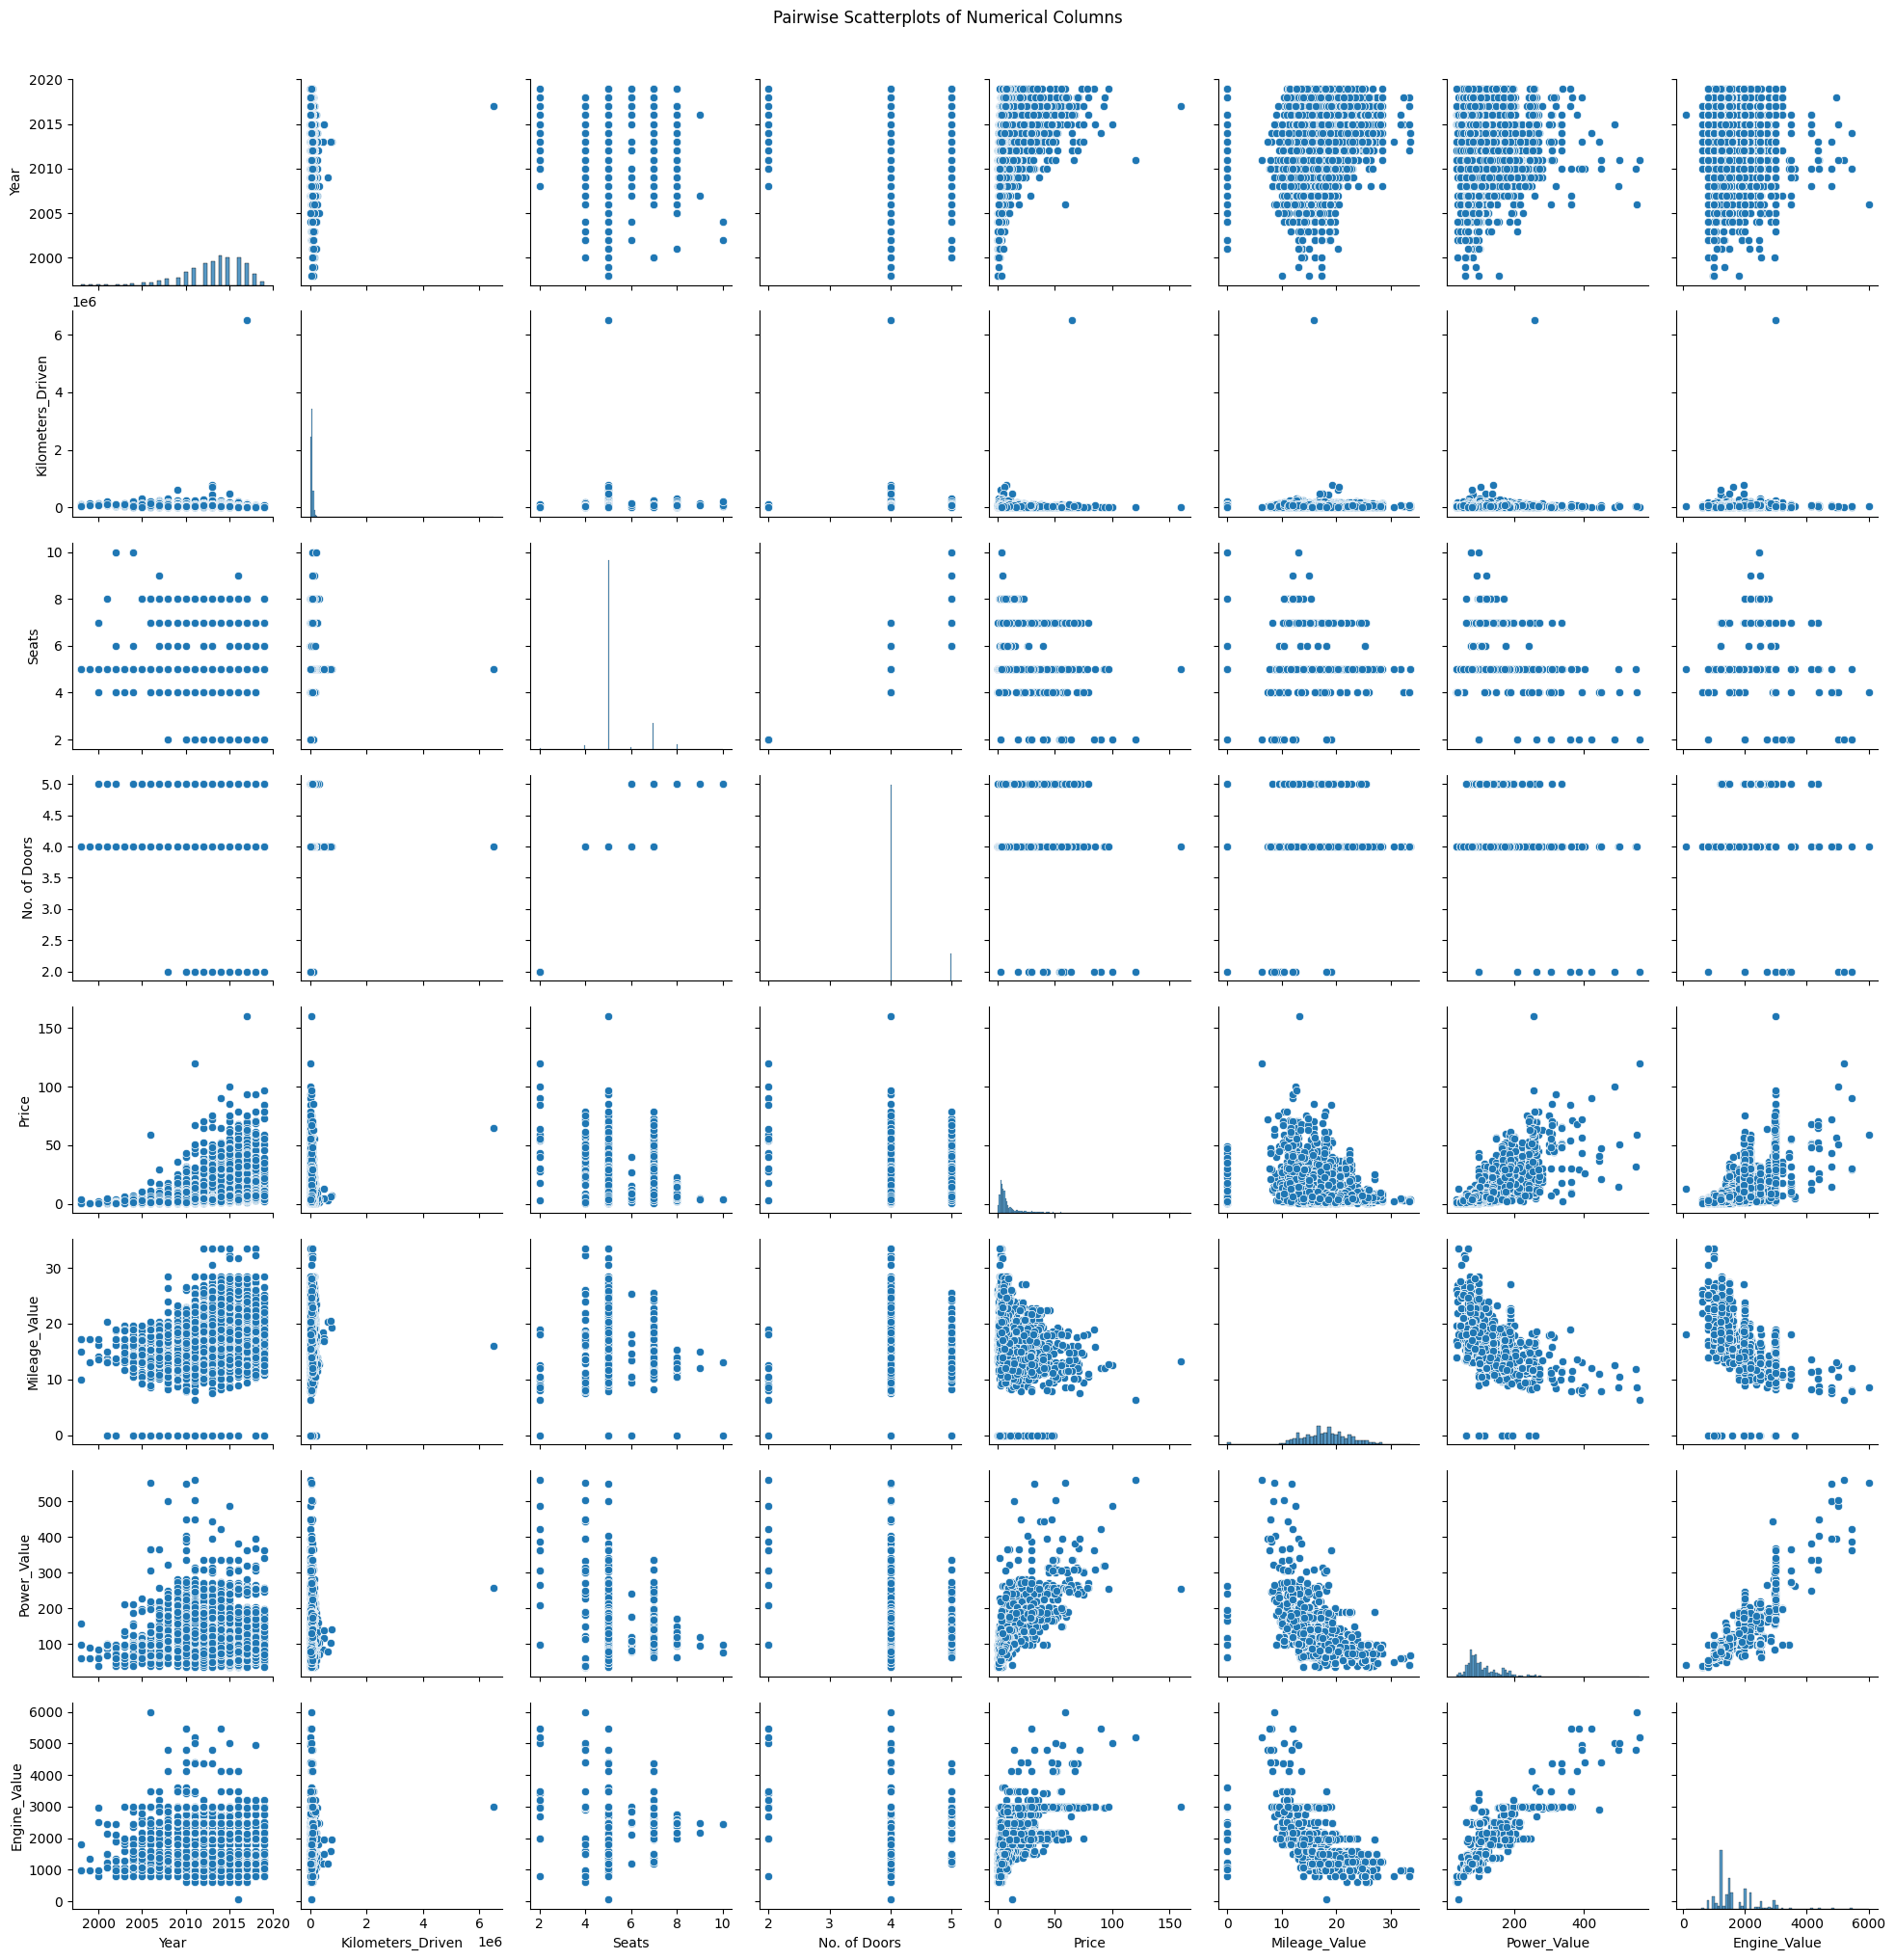

In [33]:
sns.pairplot(df[num_cols])
plt.suptitle("Pairwise Scatterplots of Numerical Columns", y=1.02)
plt.show()


##### Scatterplots for Each Column vs Price

In [34]:
num_cols

['Year',
 'Kilometers_Driven',
 'Seats',
 'No. of Doors',
 'Price',
 'Mileage_Value',
 'Power_Value',
 'Engine_Value']

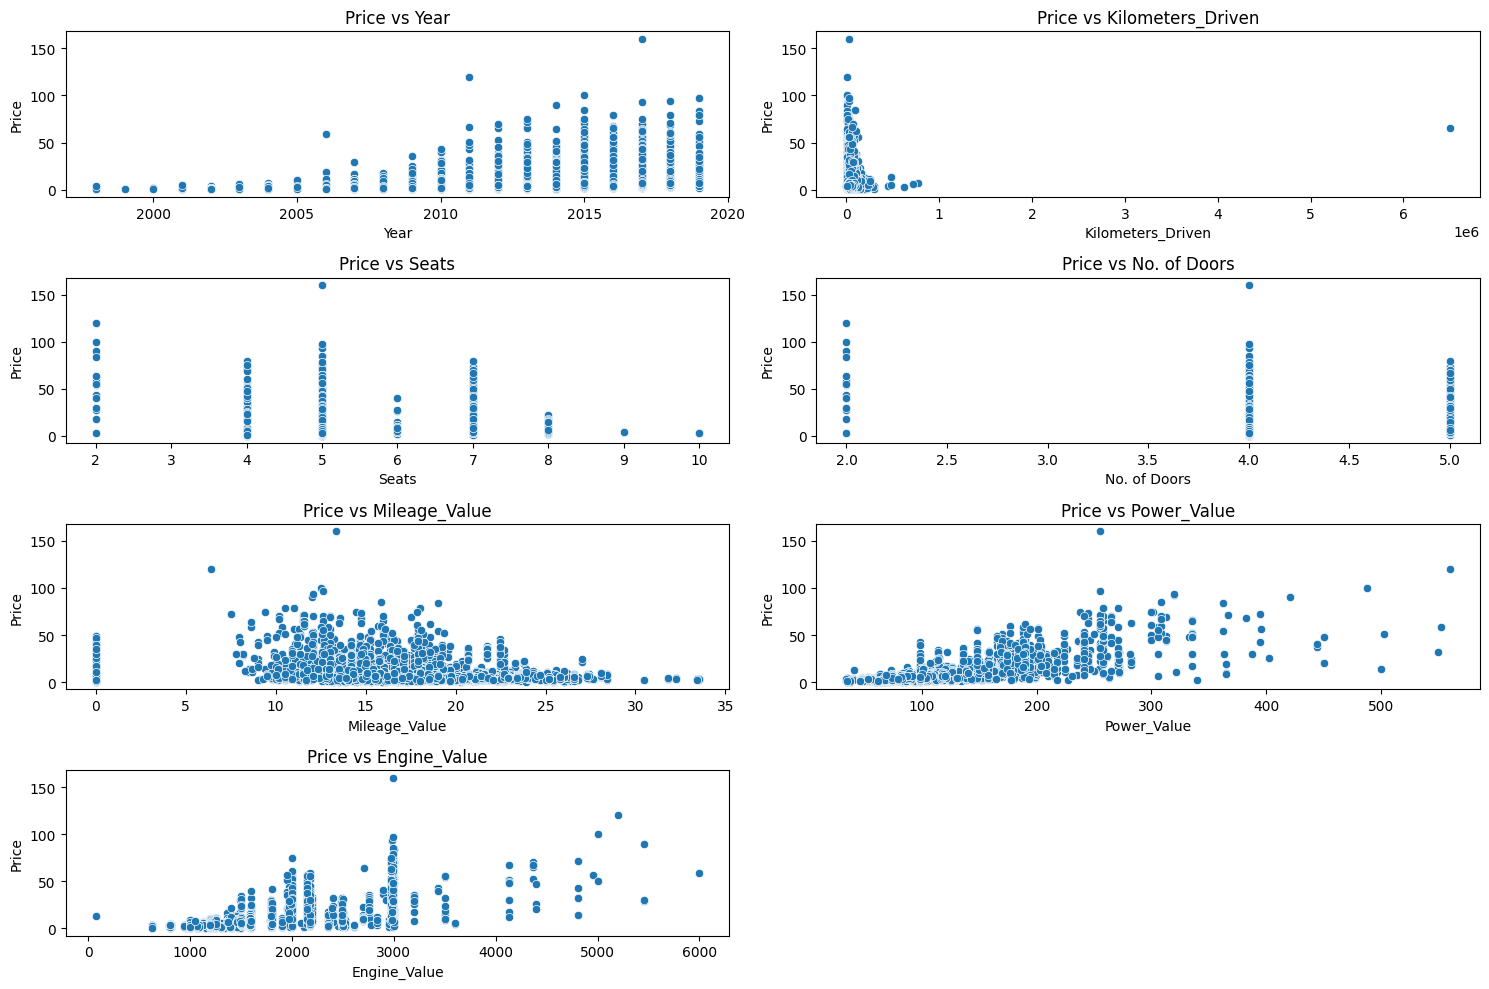

In [35]:
pos = 1
plt.figure(figsize=(15,10))
for i in num_cols:
    if i != 'Price':
        plt.subplot(4,2,pos)
        sns.scatterplot(x=i, y='Price', data=df)
        plt.title(f"Price vs {i}")
        pos+=1
plt.tight_layout()        
plt.show()


* Kilometers_Driven > Price likely decreases with more km
* Year > Newer cars have higher Price
* Engine_Value > Larger engines usually more expensive

#### Numerical vs Categorical

###### Numerical columns with categorical columns 'Fuel_Type','Transmission','Owner_Type','Colour'

In [36]:
cat_cols_1 = ['Fuel_Type','Transmission','Owner_Type','Colour']

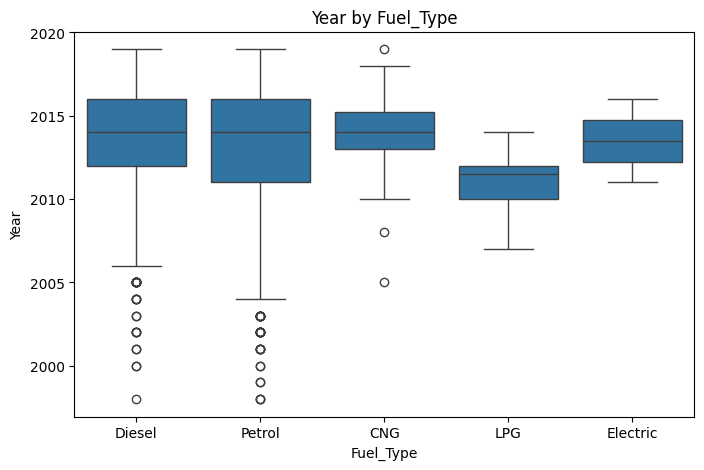

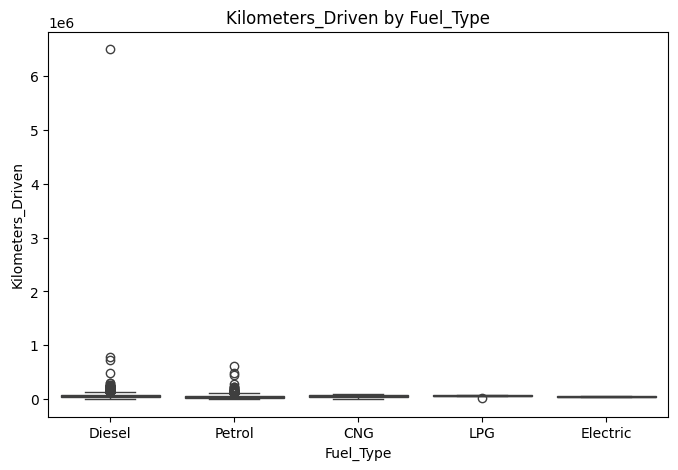

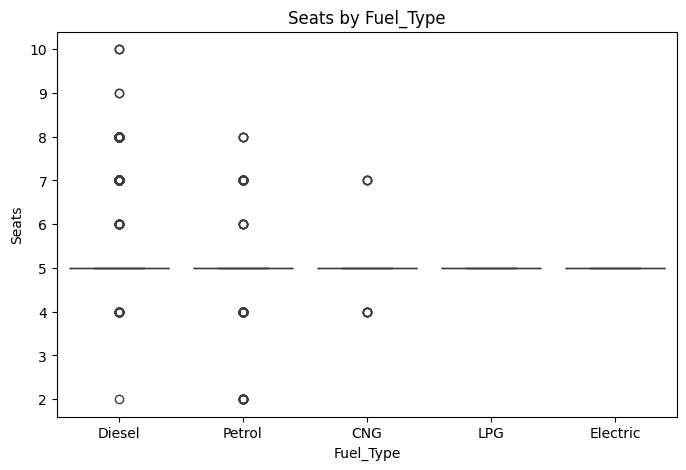

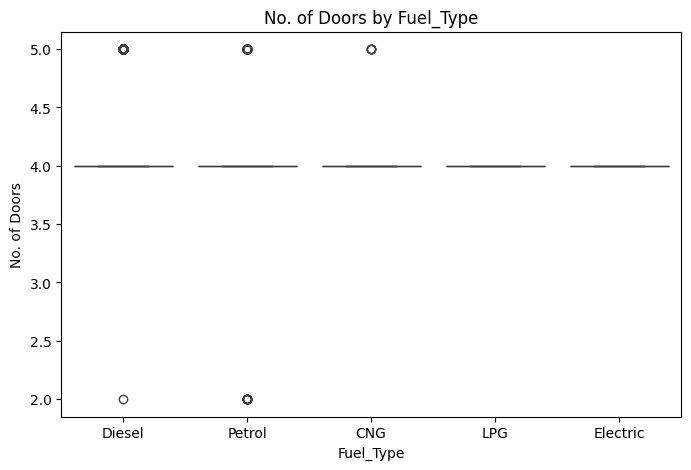

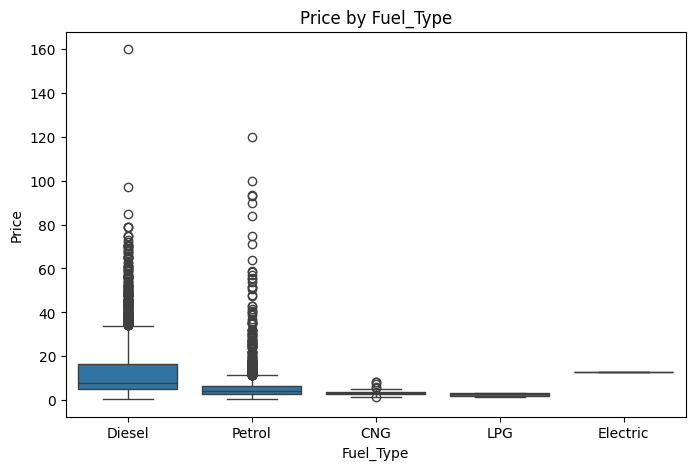

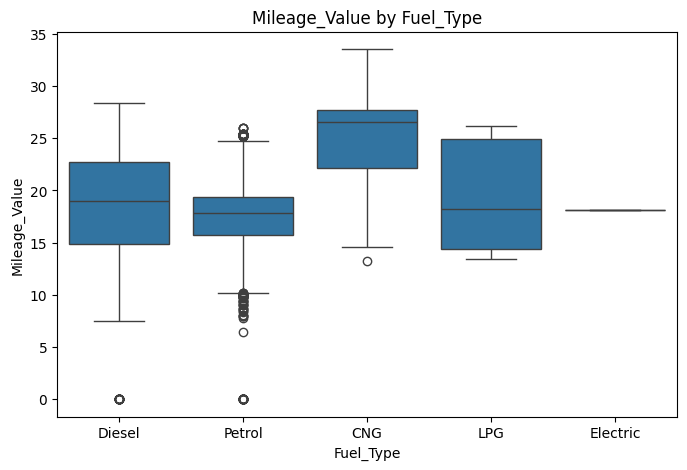

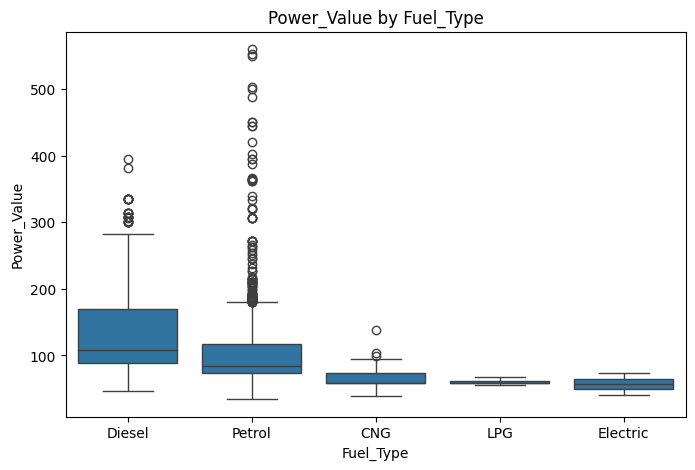

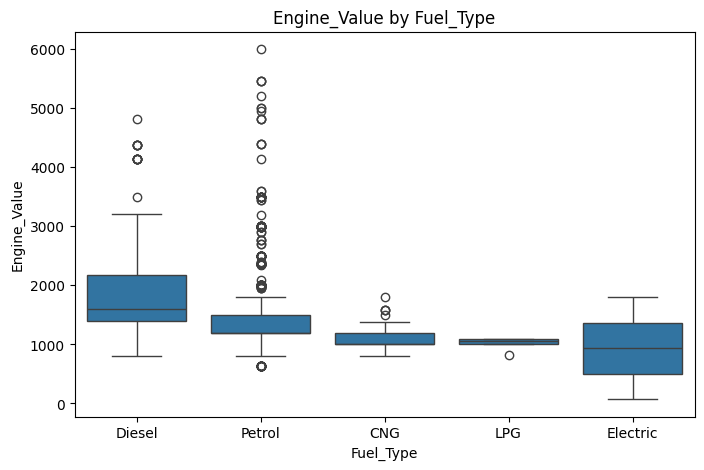

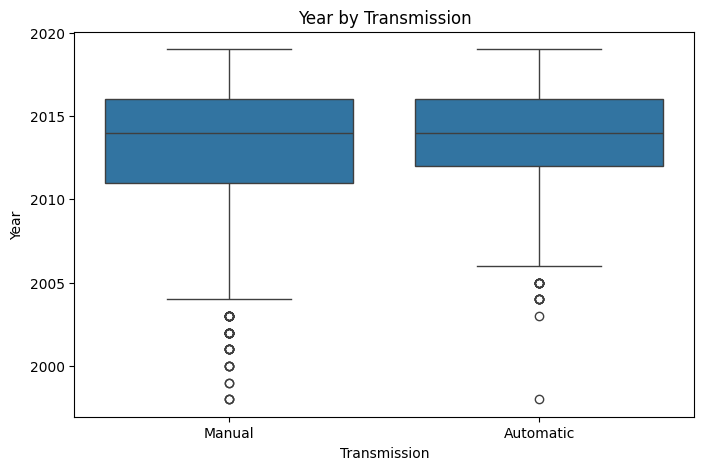

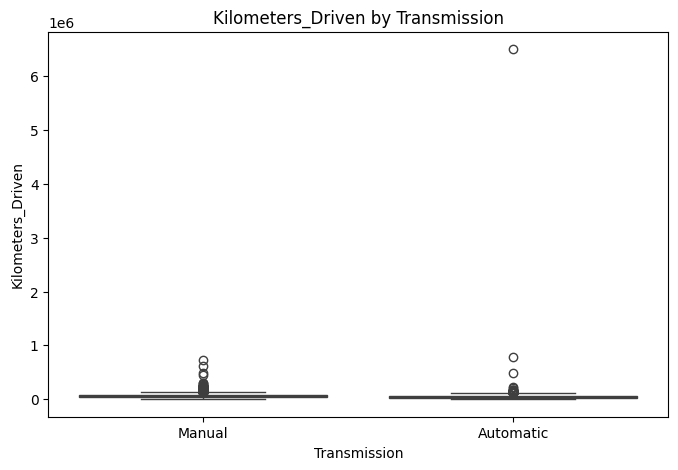

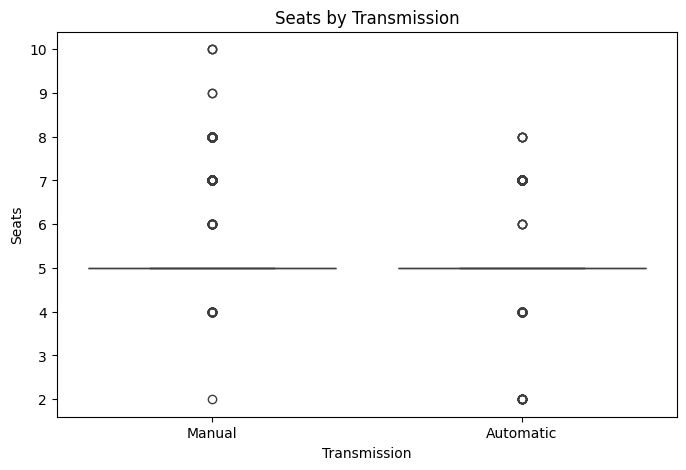

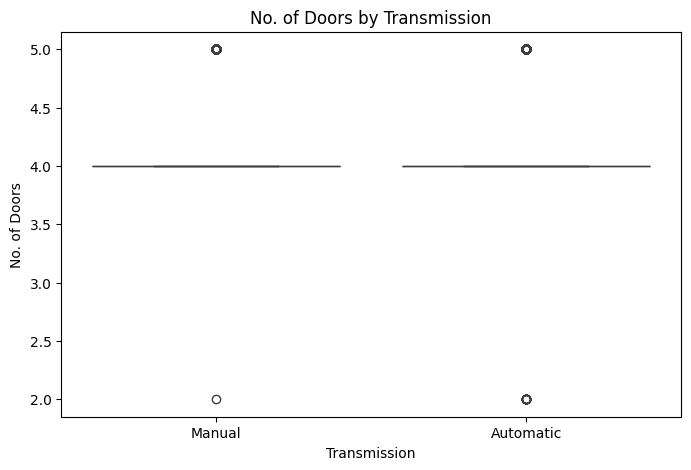

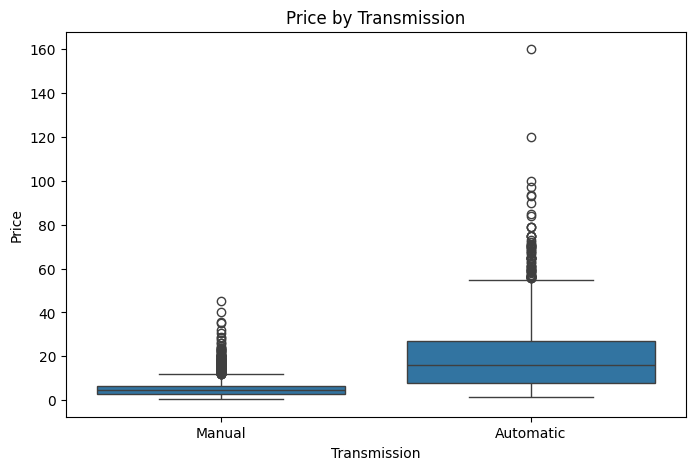

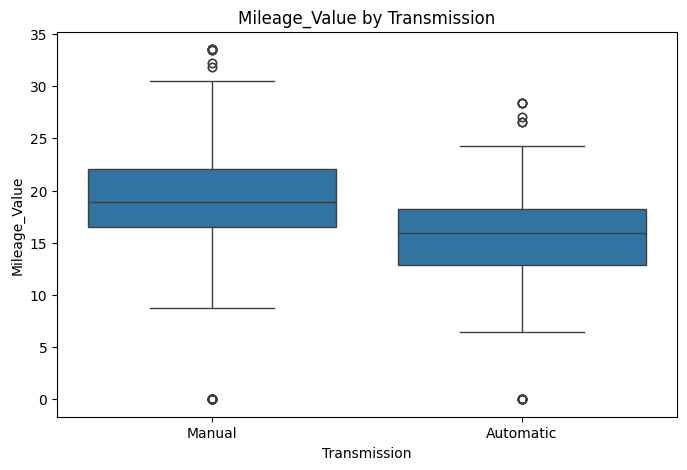

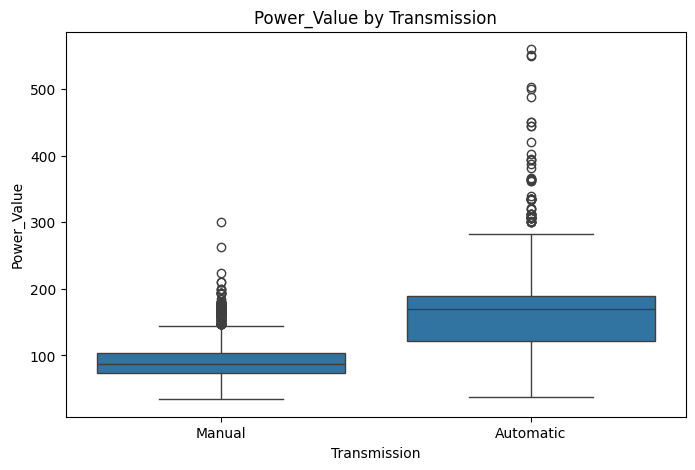

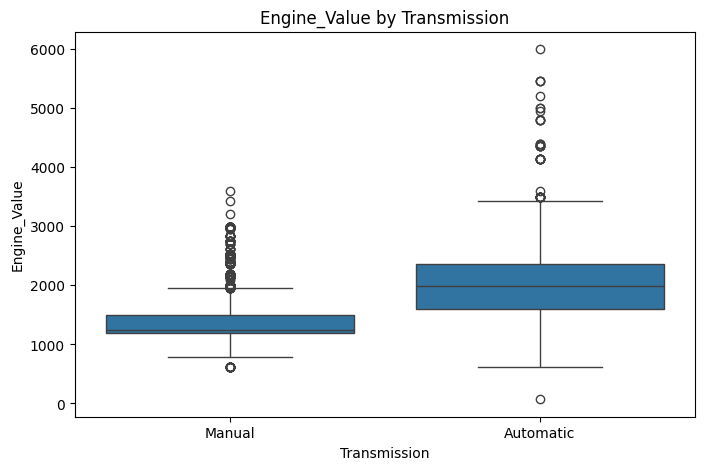

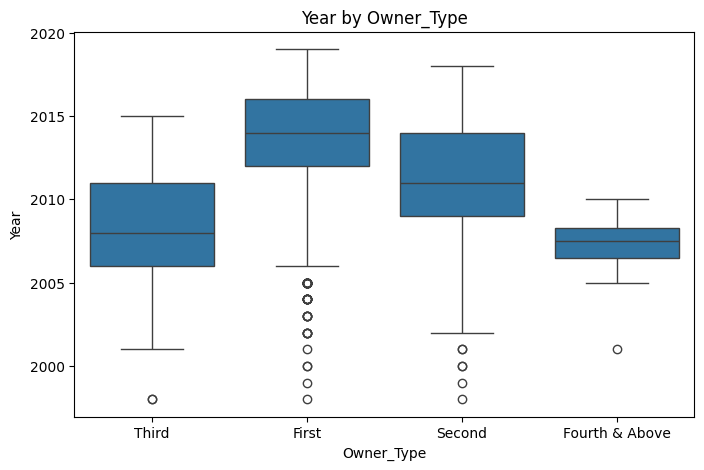

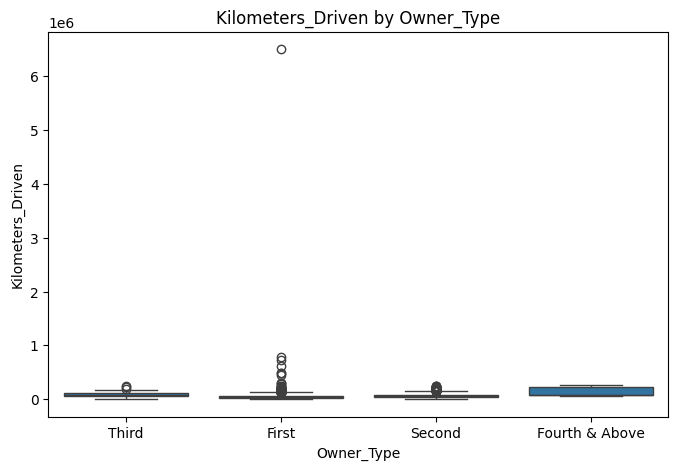

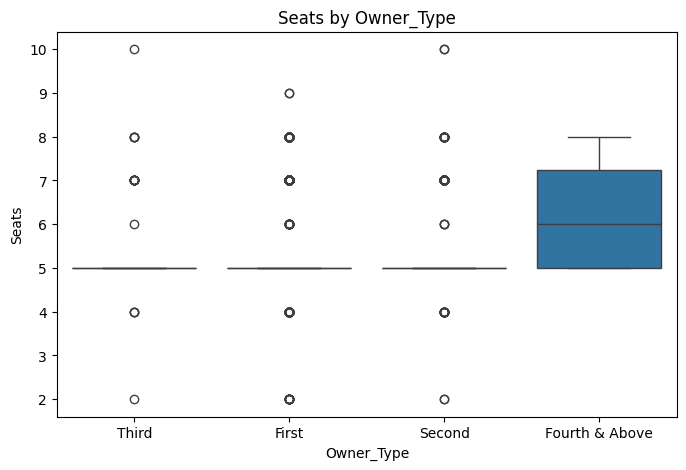

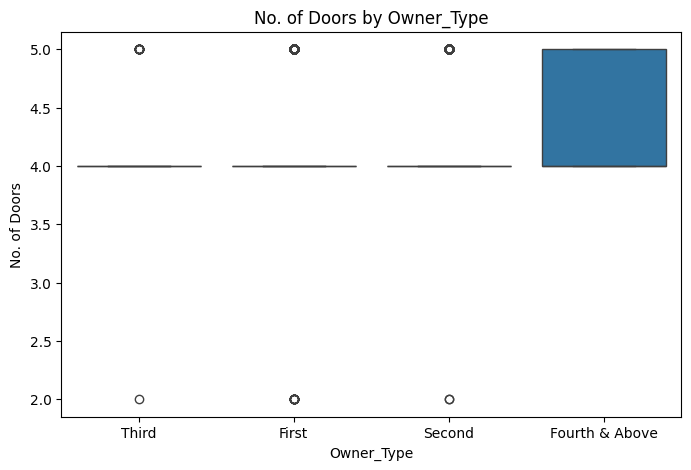

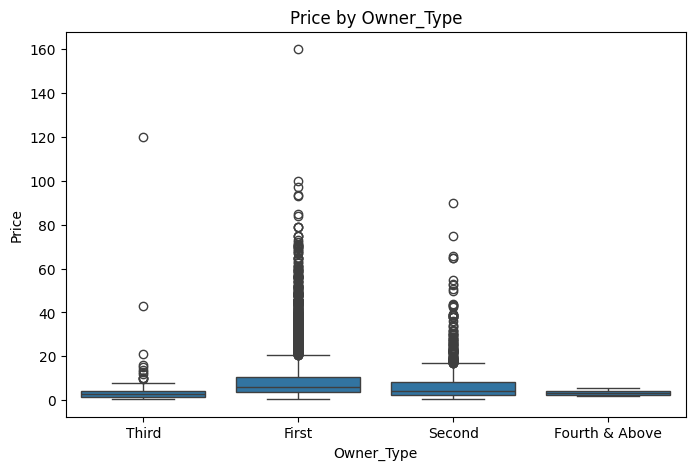

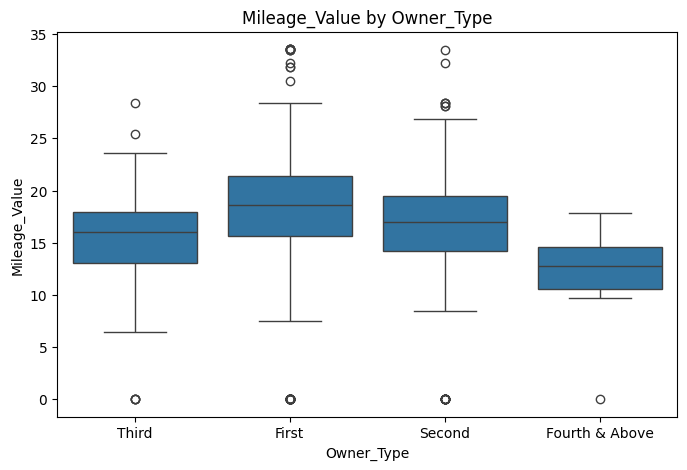

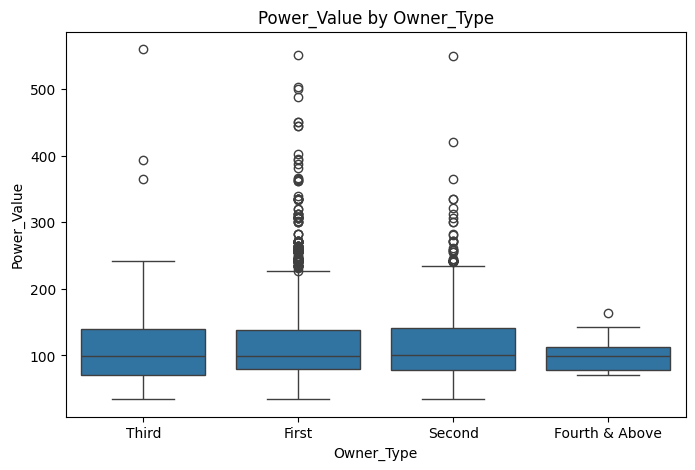

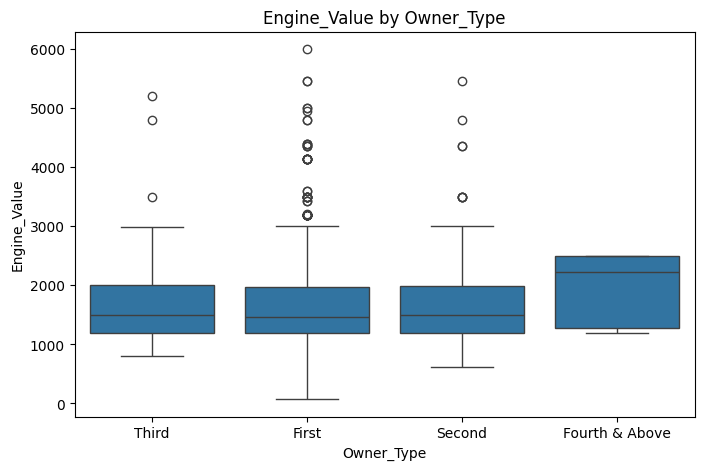

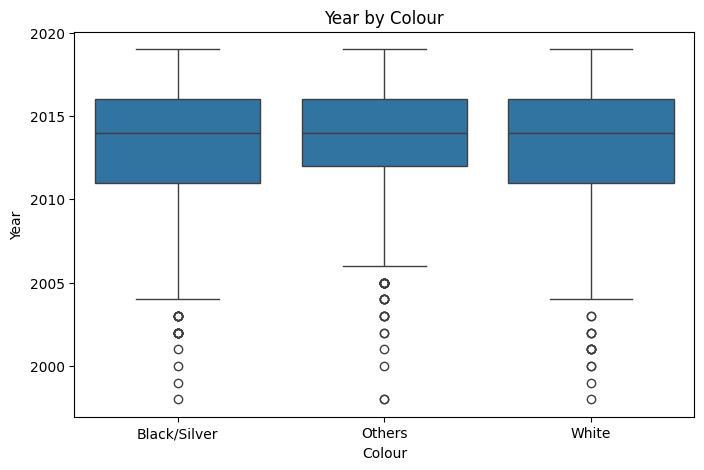

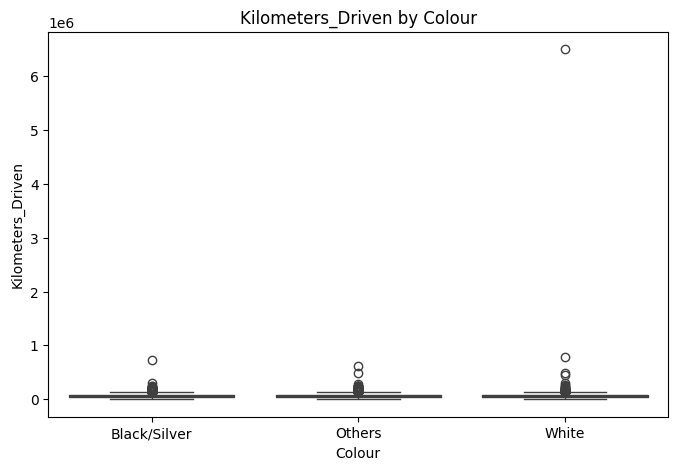

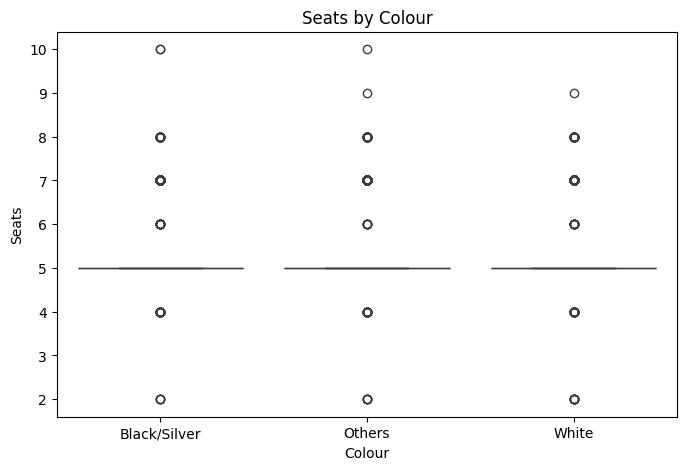

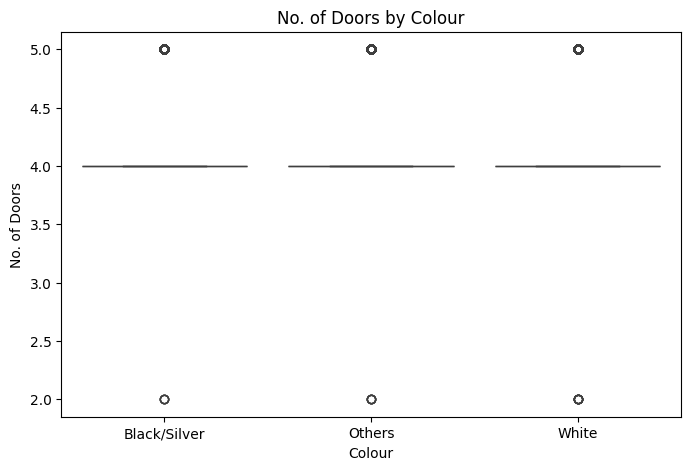

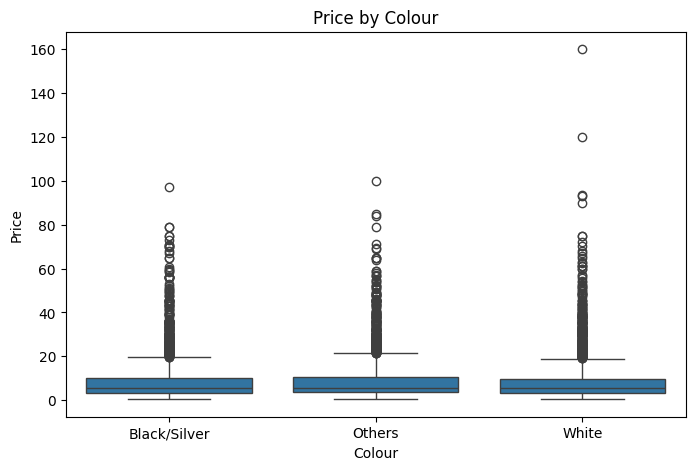

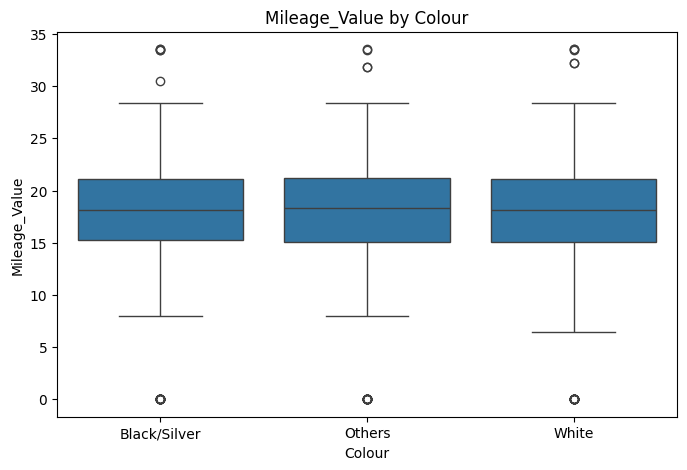

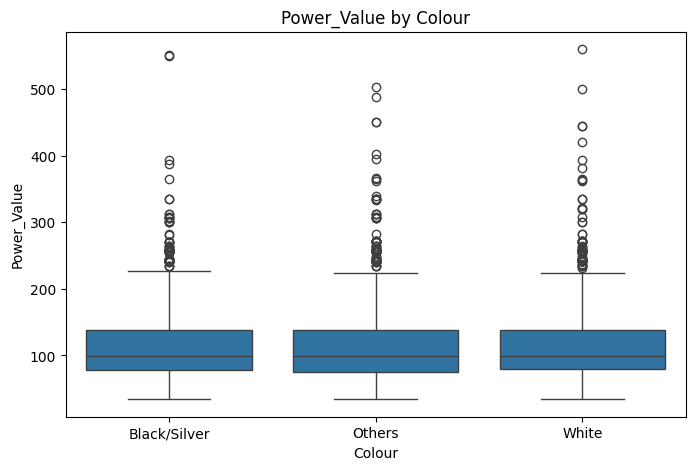

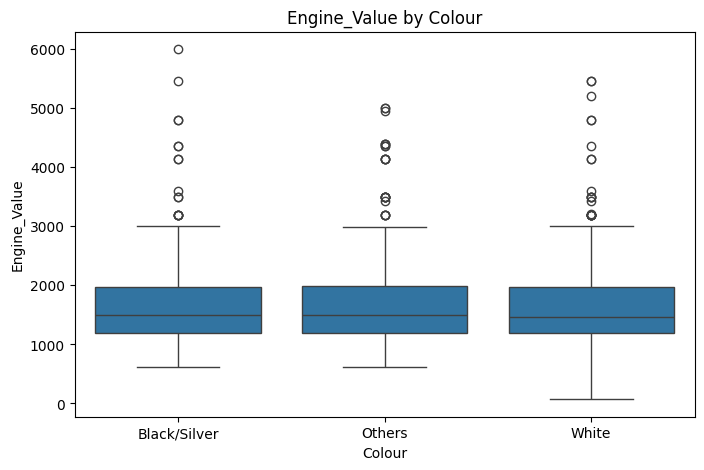

In [37]:
for cat in cat_cols_1:
    for num in num_cols:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"{num} by {cat}")
        plt.show()


### Multivariate Analysis(analyzing data with multiple variables simultaneously)

* Location and Fuel_type wise total sales
* Location and transmission wise total sales
* Location and transmission wise avg price
* Location and owner_type wise total sales
* Location and companyName wise total no of cars
* Fuel_type and transmission wise avg price
* Year and company_name wise total sales
* Year and Fuel_type wise total sales
* Year and Transmission wise total sales
* Year and owner type wise total sales
* Year and companyname wise total no of cars

In [38]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Price,Mileage_Value,Mileage_Unit,Power_Value,Power_Unit,Engine_Value,Engine_Unit,Company_Name,Model_Name
0,Pune,2012.0,99000.0,Diesel,Manual,Third,Black/Silver,8.0,5.0,6.00,12.05,kmpl,120.0,bhp,2179.0,CC,Mahindra,Scorpio
1,Kochi,2018.0,18678.0,Petrol,Manual,First,Others,5.0,4.0,8.32,21.10,kmpl,100.0,bhp,998.0,CC,Maruti,Baleno
2,Bangalore,2013.0,197000.0,Diesel,Manual,First,White,7.0,5.0,4.00,11.68,kmpl,112.0,bhp,2498.0,CC,Mahindra,Xylo
3,Delhi,2014.0,45000.0,Diesel,Manual,First,White,5.0,4.0,3.49,24.00,kmpl,70.0,bhp,1120.0,CC,Hyundai,Grand
4,Delhi,2011.0,65000.0,Diesel,Manual,First,Others,8.0,5.0,6.40,12.80,kmpl,102.0,bhp,2494.0,CC,Toyota,Innova


#### Location and year wise total sales

In [39]:
df.pivot_table(columns = 'Year',index = 'Location', values = 'Price',aggfunc = 'sum')

Year,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Location,,,,,,,,,,,,,,,,,,,,,
Ahmedabad,NaN,NaN,NaN,NaN,1.20,NaN,1.40,2.26,NaN,9.20,...,60.25,92.80,216.57,179.65,266.48,381.21,329.66,154.05,68.20,35.00
Bangalore,NaN,NaN,NaN,NaN,3.65,NaN,1.35,19.05,30.00,34.99,...,104.15,315.43,401.34,586.83,1170.08,877.99,660.11,314.40,60.45,NaN
Chennai,NaN,NaN,NaN,1.70,6.52,13.65,10.65,21.95,40.52,71.70,...,176.53,358.01,364.05,300.50,489.10,437.59,772.48,401.50,50.70,75.15
Coimbatore,NaN,NaN,NaN,NaN,NaN,NaN,1.76,2.64,NaN,19.29,...,112.49,205.91,366.91,423.80,715.32,954.86,1982.19,2119.87,1549.84,1008.28
Delhi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.10,16.66,2.36,...,121.81,527.43,511.18,832.94,1018.31,739.17,737.79,512.39,254.77,6.67
Hyderabad,0.85,NaN,1.50,NaN,1.90,2.25,6.74,16.79,94.84,92.09,...,486.81,408.75,798.97,893.08,856.85,1251.74,899.86,910.29,210.14,5.68
Jaipur,0.98,0.77,0.70,0.55,1.14,0.70,5.20,8.04,19.02,23.36,...,83.58,131.82,176.01,299.71,389.14,390.05,291.38,398.13,65.18,3.50
Kochi,NaN,NaN,NaN,NaN,NaN,1.52,7.10,NaN,5.82,1.99,...,77.73,135.80,129.75,297.54,818.07,1023.71,1107.99,1298.55,1517.14,806.52
Kolkata,NaN,NaN,1.95,NaN,1.60,0.65,NaN,12.30,1.50,35.97,...,185.85,176.56,366.08,371.65,476.12,534.09,260.09,270.96,157.21,15.49


In [40]:
df.pivot_table(columns = 'Year',index = 'Location', values = 'Price',aggfunc = 'sum').fillna(0)

Year,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Location,,,,,,,,,,,,,,,,,,,,,
Ahmedabad,0.00,0.00,0.00,0.00,1.20,0.00,1.40,2.26,0.00,9.20,...,60.25,92.80,216.57,179.65,266.48,381.21,329.66,154.05,68.20,35.00
Bangalore,0.00,0.00,0.00,0.00,3.65,0.00,1.35,19.05,30.00,34.99,...,104.15,315.43,401.34,586.83,1170.08,877.99,660.11,314.40,60.45,0.00
Chennai,0.00,0.00,0.00,1.70,6.52,13.65,10.65,21.95,40.52,71.70,...,176.53,358.01,364.05,300.50,489.10,437.59,772.48,401.50,50.70,75.15
Coimbatore,0.00,0.00,0.00,0.00,0.00,0.00,1.76,2.64,0.00,19.29,...,112.49,205.91,366.91,423.80,715.32,954.86,1982.19,2119.87,1549.84,1008.28
Delhi,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,16.66,2.36,...,121.81,527.43,511.18,832.94,1018.31,739.17,737.79,512.39,254.77,6.67
Hyderabad,0.85,0.00,1.50,0.00,1.90,2.25,6.74,16.79,94.84,92.09,...,486.81,408.75,798.97,893.08,856.85,1251.74,899.86,910.29,210.14,5.68
Jaipur,0.98,0.77,0.70,0.55,1.14,0.70,5.20,8.04,19.02,23.36,...,83.58,131.82,176.01,299.71,389.14,390.05,291.38,398.13,65.18,3.50
Kochi,0.00,0.00,0.00,0.00,0.00,1.52,7.10,0.00,5.82,1.99,...,77.73,135.80,129.75,297.54,818.07,1023.71,1107.99,1298.55,1517.14,806.52
Kolkata,0.00,0.00,1.95,0.00,1.60,0.65,0.00,12.30,1.50,35.97,...,185.85,176.56,366.08,371.65,476.12,534.09,260.09,270.96,157.21,15.49


In [41]:
#for 10 years
df_10_y = df[df['Year']<2010]
df_10_y

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Price,Mileage_Value,Mileage_Unit,Power_Value,Power_Unit,Engine_Value,Engine_Unit,Company_Name,Model_Name
8,Hyderabad,2009.0,156056.0,Diesel,Manual,First,Others,8.0,5.0,8.50,12.80,kmpl,102.00,bhp,2494.0,CC,Toyota,Innova
10,Hyderabad,2007.0,199000.0,Diesel,Manual,Second,Others,7.0,4.0,5.20,12.80,kmpl,102.00,bhp,2494.0,CC,Toyota,Innova
11,Ahmedabad,2008.0,41000.0,Petrol,Automatic,Second,White,5.0,4.0,10.50,10.40,kmpl,201.00,bhp,2773.0,CC,Audi,A6
13,Mumbai,2009.0,48000.0,Diesel,Automatic,Second,White,5.0,4.0,2.95,17.00,kmpl,105.00,bhp,1896.0,CC,Skoda,Laura
16,Pune,2009.0,94000.0,Diesel,Automatic,Second,White,7.0,5.0,12.00,12.07,kmpl,241.40,bhp,2967.0,CC,Audi,Q7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,Bangalore,2007.0,60000.0,Diesel,Manual,Second,White,5.0,4.0,3.40,17.80,kmpl,98.59,bhp,1248.0,CC,Maruti,Swift
5926,Kolkata,2008.0,38000.0,Petrol,Manual,First,Black/Silver,5.0,4.0,1.10,19.70,kmpl,46.30,bhp,796.0,CC,Maruti,Alto
5928,Mumbai,2008.0,125000.0,Petrol,Automatic,Third,Black/Silver,5.0,4.0,2.60,11.70,kmpl,177.60,bhp,2354.0,CC,Honda,Accord
5930,Chennai,2007.0,75000.0,Petrol,Manual,Second,Black/Silver,5.0,4.0,2.00,16.60,kmpl,68.00,bhp,1388.0,CC,Ford,Fiesta


In [42]:
df_10_y.pivot_table(columns = 'Year',index = 'Location', values = 'Price',aggfunc = 'sum').fillna(0)

Year,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0
Location,,,,,,,,,,,,
Ahmedabad,0.00,0.00,0.00,0.00,1.20,0.00,1.40,2.26,0.00,9.20,44.56,45.75
Bangalore,0.00,0.00,0.00,0.00,3.65,0.00,1.35,19.05,30.00,34.99,33.80,124.28
Chennai,0.00,0.00,0.00,1.70,6.52,13.65,10.65,21.95,40.52,71.70,76.34,150.55
Coimbatore,0.00,0.00,0.00,0.00,0.00,0.00,1.76,2.64,0.00,19.29,24.51,34.48
Delhi,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,16.66,2.36,31.94,43.51
Hyderabad,0.85,0.00,1.50,0.00,1.90,2.25,6.74,16.79,94.84,92.09,113.91,185.76
Jaipur,0.98,0.77,0.70,0.55,1.14,0.70,5.20,8.04,19.02,23.36,29.30,69.60
Kochi,0.00,0.00,0.00,0.00,0.00,1.52,7.10,0.00,5.82,1.99,3.42,16.08
Kolkata,0.00,0.00,1.95,0.00,1.60,0.65,0.00,12.30,1.50,35.97,27.01,87.04


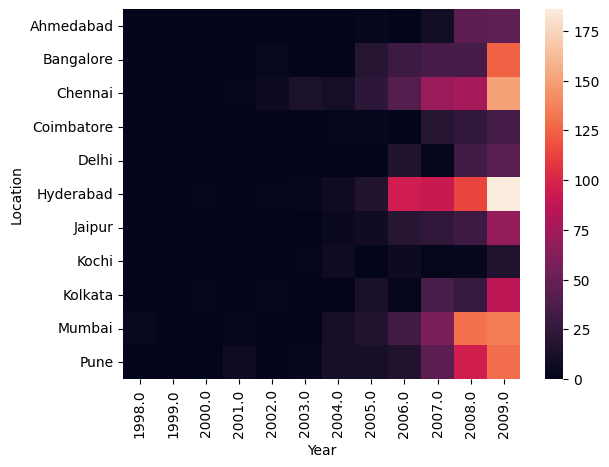

In [43]:
sns.heatmap(df_10_y.pivot_table(columns = 'Year',index = 'Location', values = 'Price',aggfunc = 'sum').fillna(0))
plt.show()

In [44]:
df['Year'].unique()

array([2012., 2018., 2013., 2014., 2011., 2016., 2015., 2009., 2007.,
       2008., 2017., 2010., 2019., 2006., 2004., 2005., 2001., 2003.,
       2002., 2000., 1998., 1999.])

In [45]:
# for next 10 years
df_20_y = df[df['Year']<2022]
df_20_y

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Price,Mileage_Value,Mileage_Unit,Power_Value,Power_Unit,Engine_Value,Engine_Unit,Company_Name,Model_Name
0,Pune,2012.0,99000.0,Diesel,Manual,Third,Black/Silver,8.0,5.0,6.00,12.05,kmpl,120.0,bhp,2179.0,CC,Mahindra,Scorpio
1,Kochi,2018.0,18678.0,Petrol,Manual,First,Others,5.0,4.0,8.32,21.10,kmpl,100.0,bhp,998.0,CC,Maruti,Baleno
2,Bangalore,2013.0,197000.0,Diesel,Manual,First,White,7.0,5.0,4.00,11.68,kmpl,112.0,bhp,2498.0,CC,Mahindra,Xylo
3,Delhi,2014.0,45000.0,Diesel,Manual,First,White,5.0,4.0,3.49,24.00,kmpl,70.0,bhp,1120.0,CC,Hyundai,Grand
4,Delhi,2011.0,65000.0,Diesel,Manual,First,Others,8.0,5.0,6.40,12.80,kmpl,102.0,bhp,2494.0,CC,Toyota,Innova
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,Pune,2011.0,47000.0,Petrol,Automatic,Second,Others,5.0,4.0,4.50,13.90,kmpl,130.3,bhp,1799.0,CC,Honda,Civic
5957,Delhi,2013.0,63777.0,Petrol,Manual,First,Black/Silver,5.0,4.0,3.67,18.50,kmpl,82.9,bhp,1197.0,CC,Hyundai,i20
5958,Coimbatore,2016.0,37806.0,Petrol,Manual,First,Black/Silver,5.0,4.0,5.20,20.40,kmpl,81.8,bhp,1197.0,CC,Maruti,Swift
5959,Coimbatore,2016.0,22732.0,Petrol,Automatic,First,Black/Silver,2.0,2.0,55.54,18.10,kmpl,306.0,bhp,3498.0,CC,Mercedes-Benz,SLK-Class


In [46]:
df_20_y.pivot_table(columns = 'Year',index = 'Location', values = 'Price',aggfunc = 'sum').fillna(0)

Year,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Location,,,,,,,,,,,,,,,,,,,,,
Ahmedabad,0.00,0.00,0.00,0.00,1.20,0.00,1.40,2.26,0.00,9.20,...,60.25,92.80,216.57,179.65,266.48,381.21,329.66,154.05,68.20,35.00
Bangalore,0.00,0.00,0.00,0.00,3.65,0.00,1.35,19.05,30.00,34.99,...,104.15,315.43,401.34,586.83,1170.08,877.99,660.11,314.40,60.45,0.00
Chennai,0.00,0.00,0.00,1.70,6.52,13.65,10.65,21.95,40.52,71.70,...,176.53,358.01,364.05,300.50,489.10,437.59,772.48,401.50,50.70,75.15
Coimbatore,0.00,0.00,0.00,0.00,0.00,0.00,1.76,2.64,0.00,19.29,...,112.49,205.91,366.91,423.80,715.32,954.86,1982.19,2119.87,1549.84,1008.28
Delhi,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,16.66,2.36,...,121.81,527.43,511.18,832.94,1018.31,739.17,737.79,512.39,254.77,6.67
Hyderabad,0.85,0.00,1.50,0.00,1.90,2.25,6.74,16.79,94.84,92.09,...,486.81,408.75,798.97,893.08,856.85,1251.74,899.86,910.29,210.14,5.68
Jaipur,0.98,0.77,0.70,0.55,1.14,0.70,5.20,8.04,19.02,23.36,...,83.58,131.82,176.01,299.71,389.14,390.05,291.38,398.13,65.18,3.50
Kochi,0.00,0.00,0.00,0.00,0.00,1.52,7.10,0.00,5.82,1.99,...,77.73,135.80,129.75,297.54,818.07,1023.71,1107.99,1298.55,1517.14,806.52
Kolkata,0.00,0.00,1.95,0.00,1.60,0.65,0.00,12.30,1.50,35.97,...,185.85,176.56,366.08,371.65,476.12,534.09,260.09,270.96,157.21,15.49


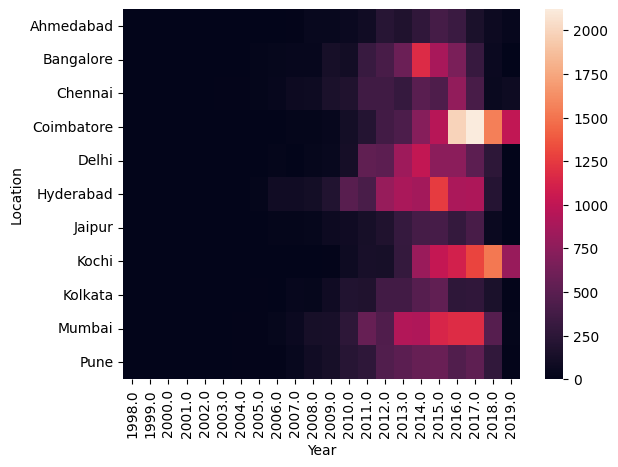

In [47]:
sns.heatmap(df_20_y.pivot_table(columns = 'Year',index = 'Location', values = 'Price',aggfunc = 'sum').fillna(0))
plt.show()

#### Location and Fuel_type wise total sales

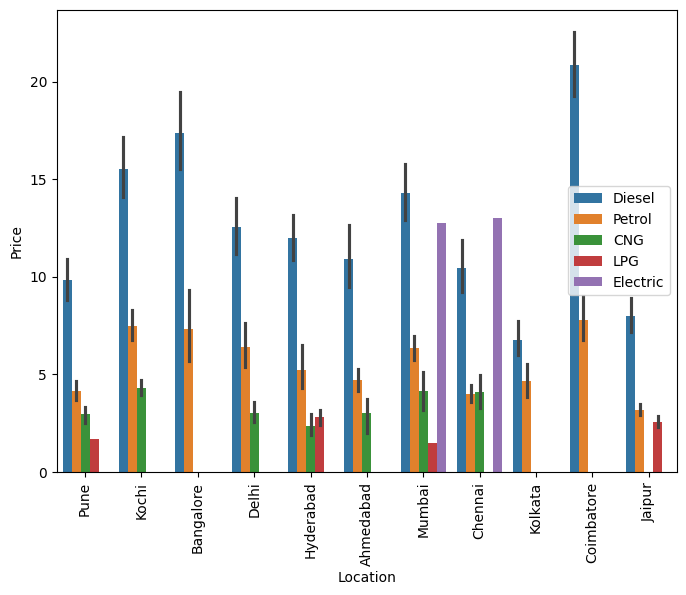

In [48]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Location',y = 'Price', hue = 'Fuel_Type',data=df)
plt.legend(loc = 'right')
plt.xticks(rotation = 90)
plt.show()

#### Location and transmission wise total sales

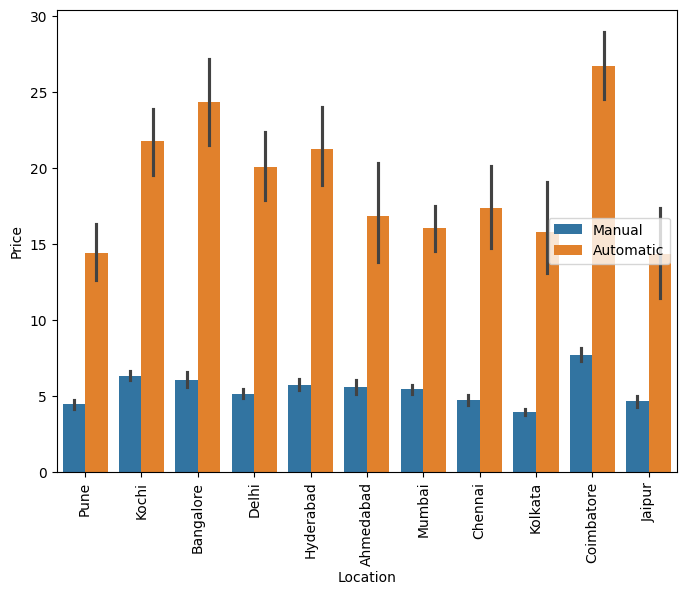

In [49]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Location',y = 'Price', hue = 'Transmission',data=df)
plt.legend(loc = 'right')
plt.xticks(rotation = 90)
plt.show()

#### Location and transmission wise avg price

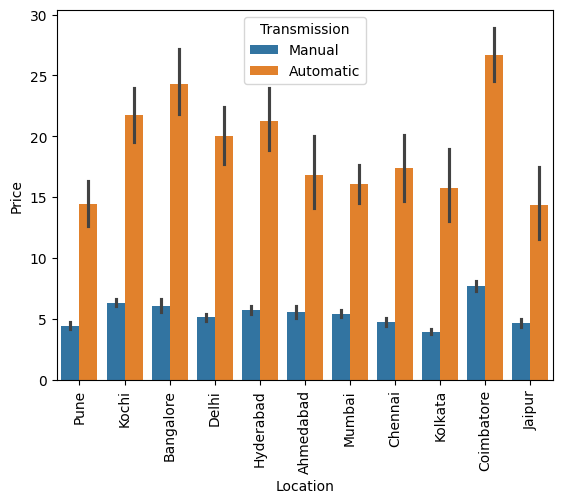

In [50]:
sns.barplot(x='Location',y='Price',hue='Transmission',estimator=np.mean,data=df)
plt.xticks(rotation = 90)
plt.show()


#### Location and owner_type wise total sales

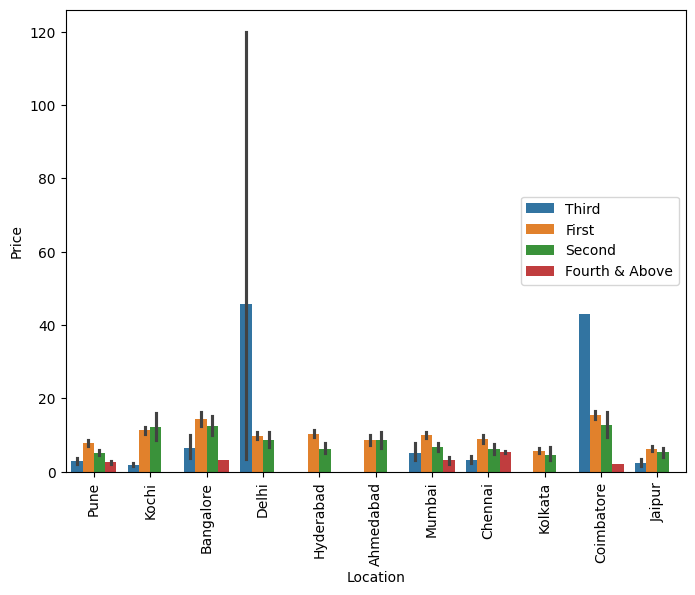

In [51]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Location',y = 'Price', hue = 'Owner_Type',data=df)
plt.legend(loc = 'right')
plt.xticks(rotation = 90)
plt.show()

#### Fuel_type and transmission wise avg price

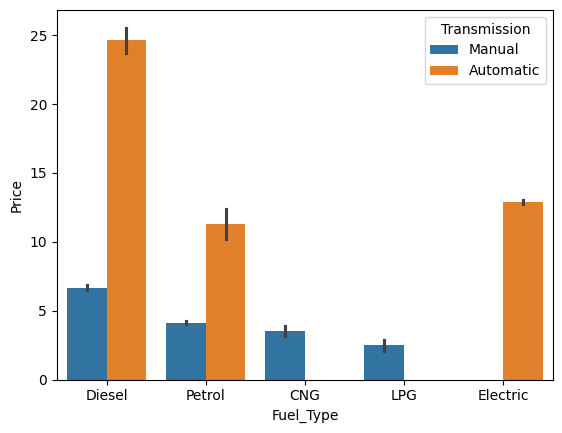

In [52]:
sns.barplot(x = 'Fuel_Type', y = 'Price', hue ='Transmission', estimator = 'mean',data = df)
plt.show()

#### Location and companyName wise total no of cars

In [58]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Colour', 'Seats', 'No. of Doors', 'Price',
       'Mileage_Value', 'Mileage_Unit', 'Power_Value', 'Power_Unit',
       'Engine_Value', 'Engine_Unit', 'Company_Name', 'Model_Name'],
      dtype='object')

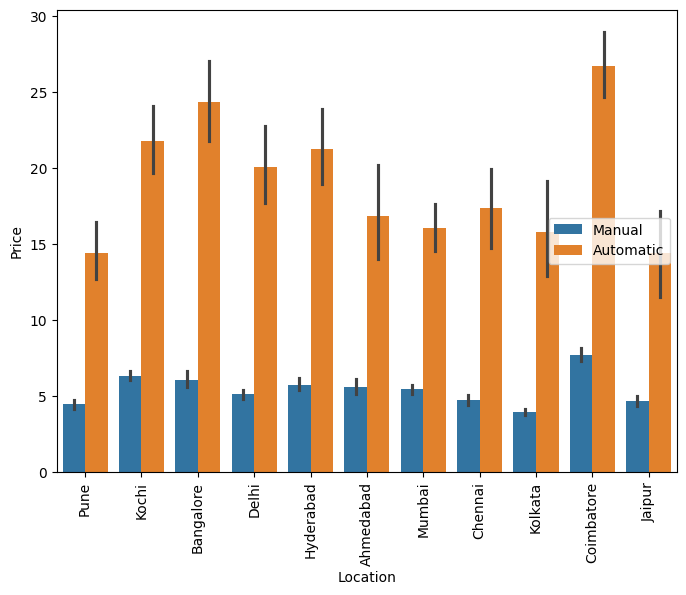

In [55]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Location',y = 'Price', hue = 'Transmission',data=df)
plt.legend(loc = 'right')
plt.xticks(rotation = 90)
plt.show()

#### Year and company_name wise total sales


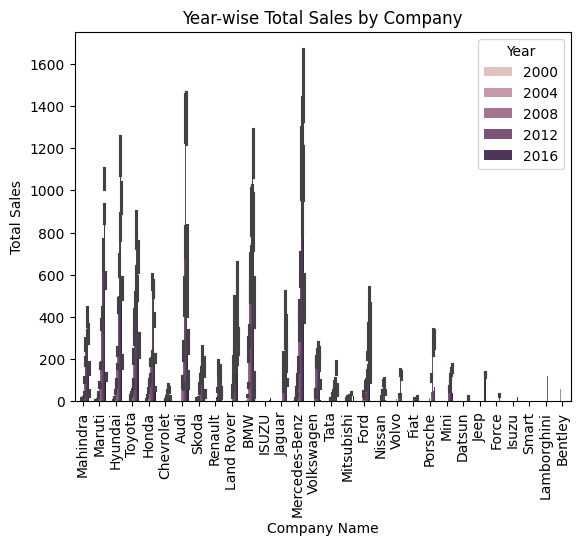

In [65]:
sns.barplot(x='Company_Name',y='Price',hue='Year',estimator=np.sum,data=df)
plt.xticks(rotation=90)
plt.title('Year-wise Total Sales by Company')
plt.xlabel('Company Name')
plt.ylabel('Total Sales')
plt.show()

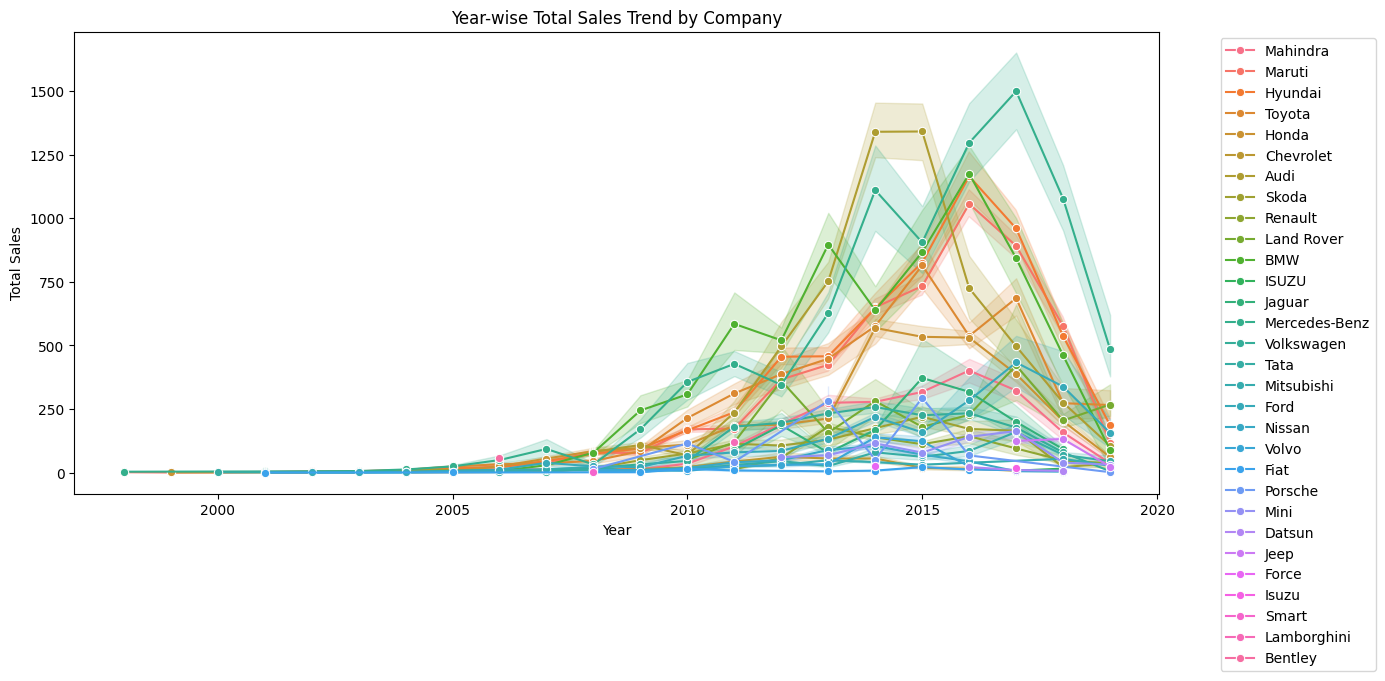

In [66]:

plt.figure(figsize=(14,6))
sns.lineplot(x='Year',y='Price',hue='Company_Name',estimator='sum',marker='o',data=df)
plt.title('Year-wise Total Sales Trend by Company')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Year and Fuel_type wise total sales

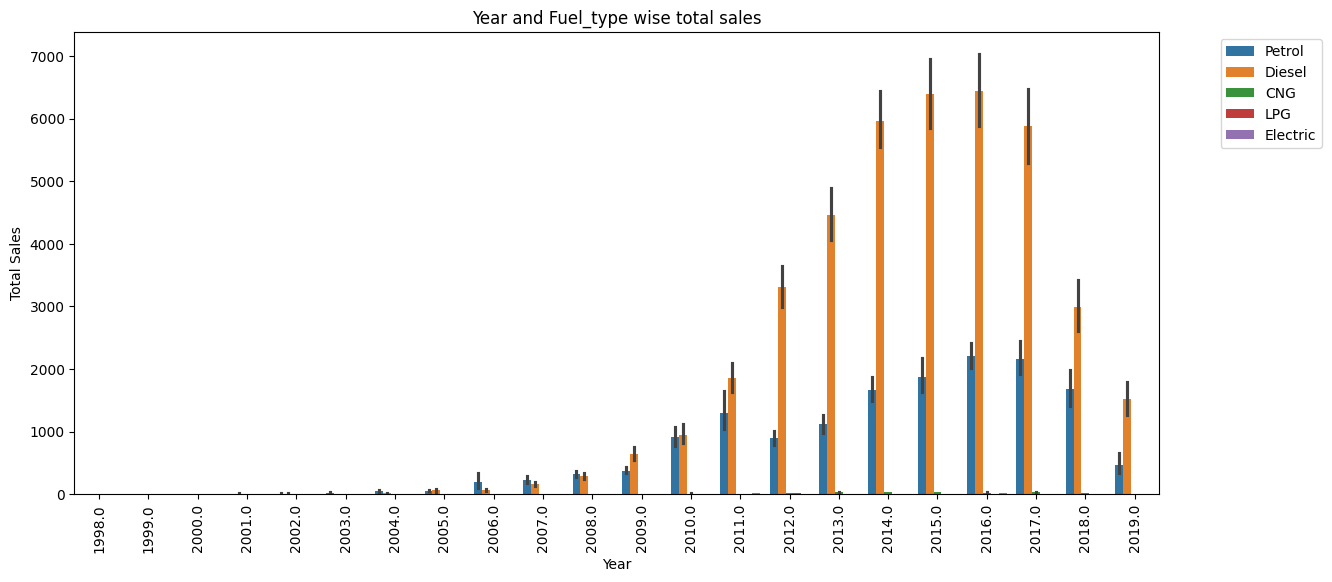

In [72]:
plt.figure(figsize=(14,6))
sns.barplot(x='Year',y='Price',hue='Fuel_Type',estimator='sum',data=df)
plt.xticks(rotation=90)
plt.title('Year and Fuel_type wise total sales')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

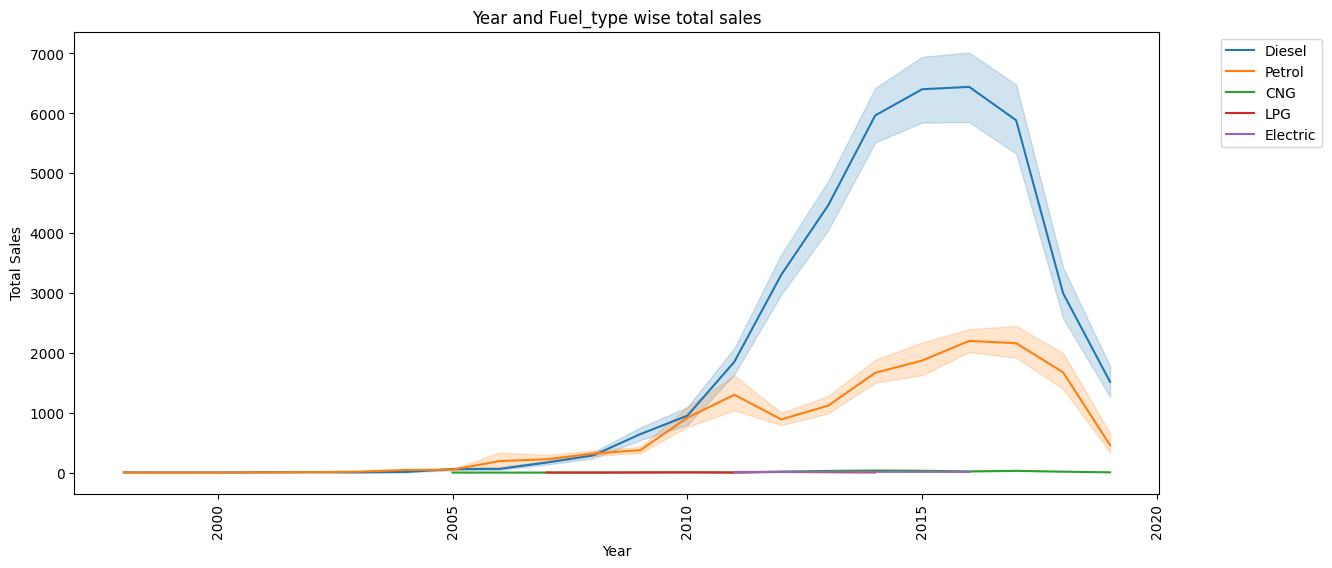

In [73]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Year',y='Price',hue='Fuel_Type',estimator='sum',data=df)
plt.title('Year and Fuel_type wise total sales')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Year and Transmission wise total sales


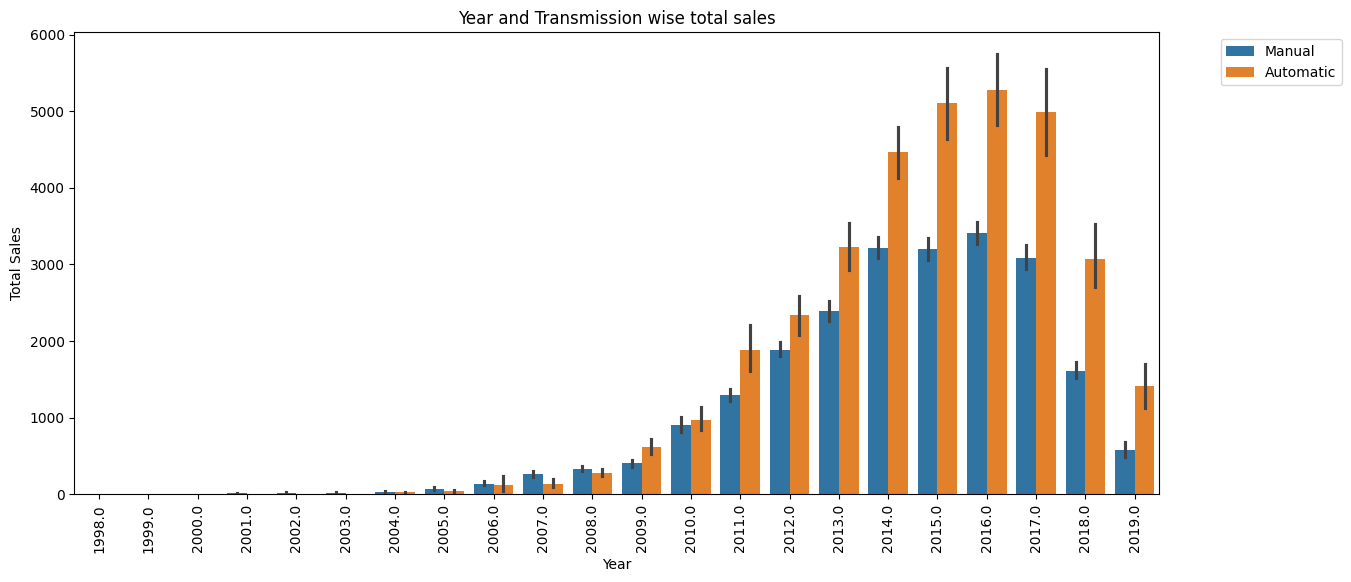

In [74]:
plt.figure(figsize=(14,6))
sns.barplot(x='Year',y='Price',hue='Transmission',estimator='sum',data=df)
plt.title('Year and Transmission wise total sales')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

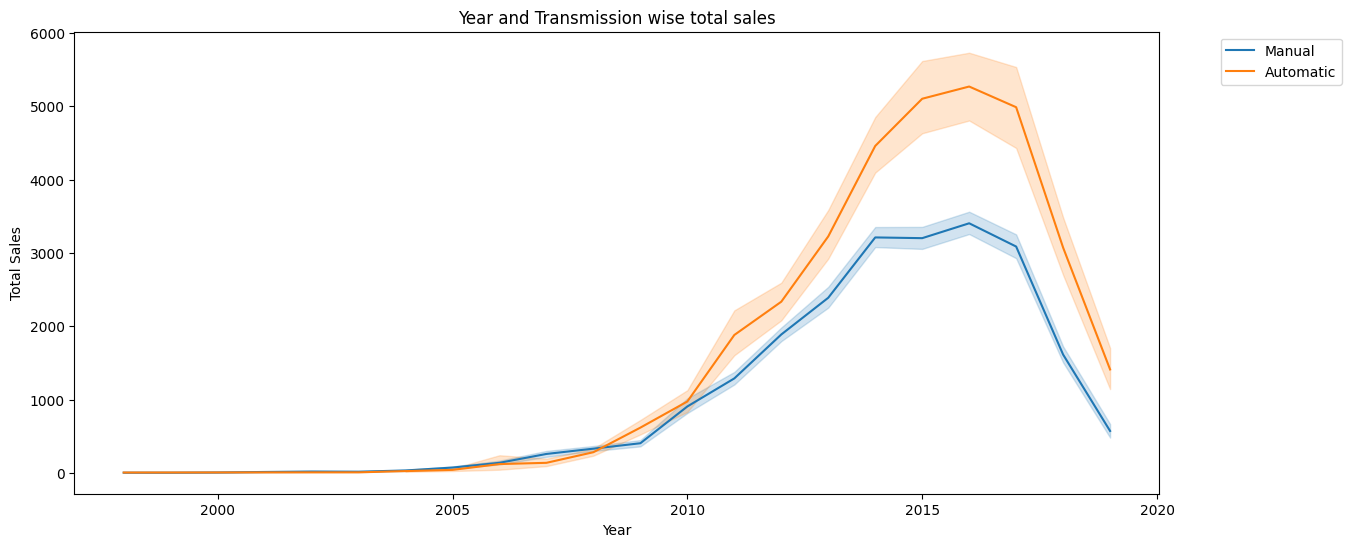

In [70]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Year',y='Price',hue='Transmission',estimator='sum',data=df)
plt.title('Year and Transmission wise total sales')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Year and owner type wise total sales

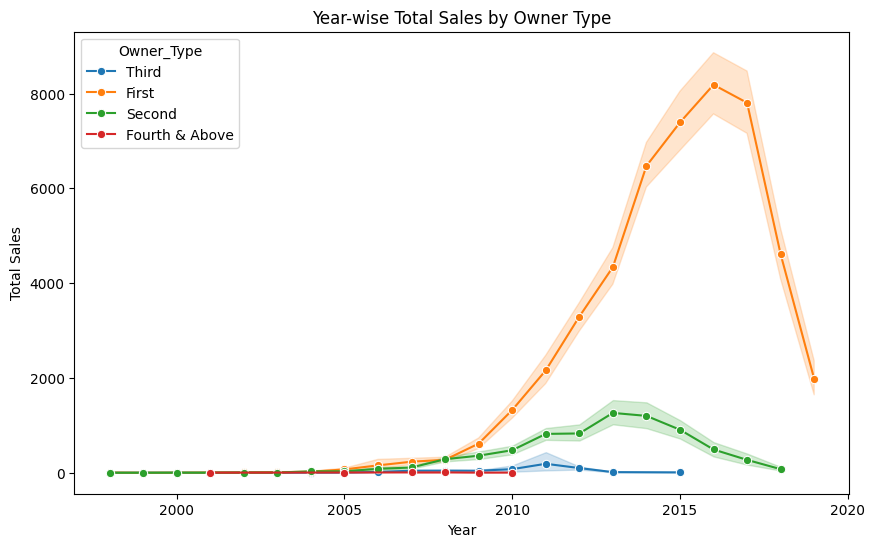

In [75]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year',y='Price',hue='Owner_Type',estimator='sum',marker='o',data=df)
plt.title('Year-wise Total Sales by Owner Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

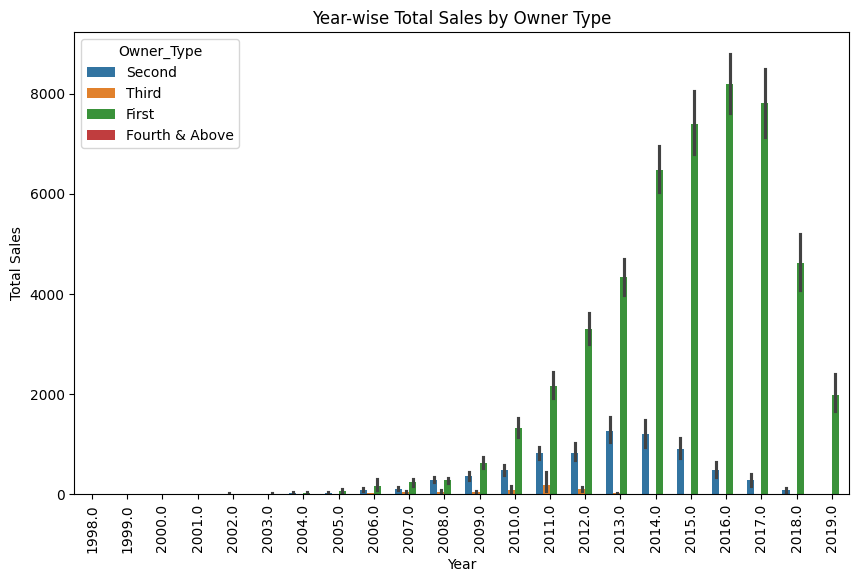

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year',y='Price',hue='Owner_Type',estimator='sum',data=df)
plt.title('Year-wise Total Sales by Owner Type')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

#### Year and companyname wise total no of cars

In [92]:
car_count = (df.groupby(['Year', 'Company_Name']).size().reset_index(name='Total_Cars'))

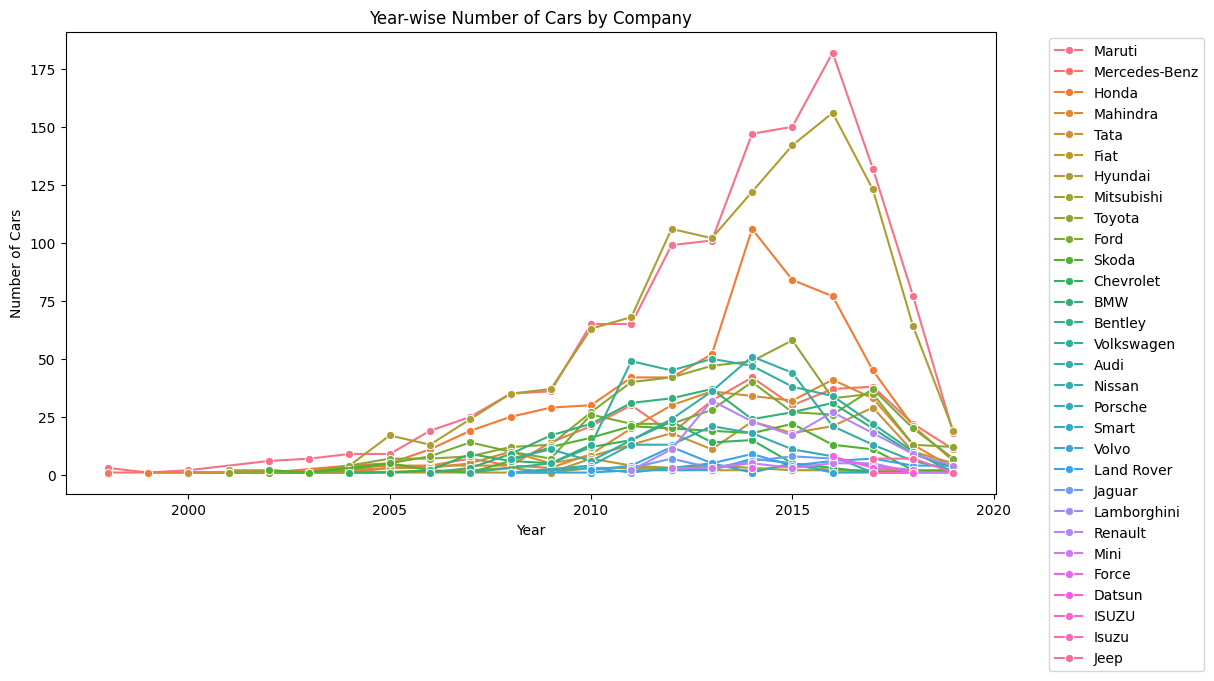

In [93]:
plt.figure(figsize=(12,6))
sns.lineplot(data=car_count,x='Year',y='Total_Cars',hue='Company_Name',marker='o')
plt.title('Year-wise Number of Cars by Company')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

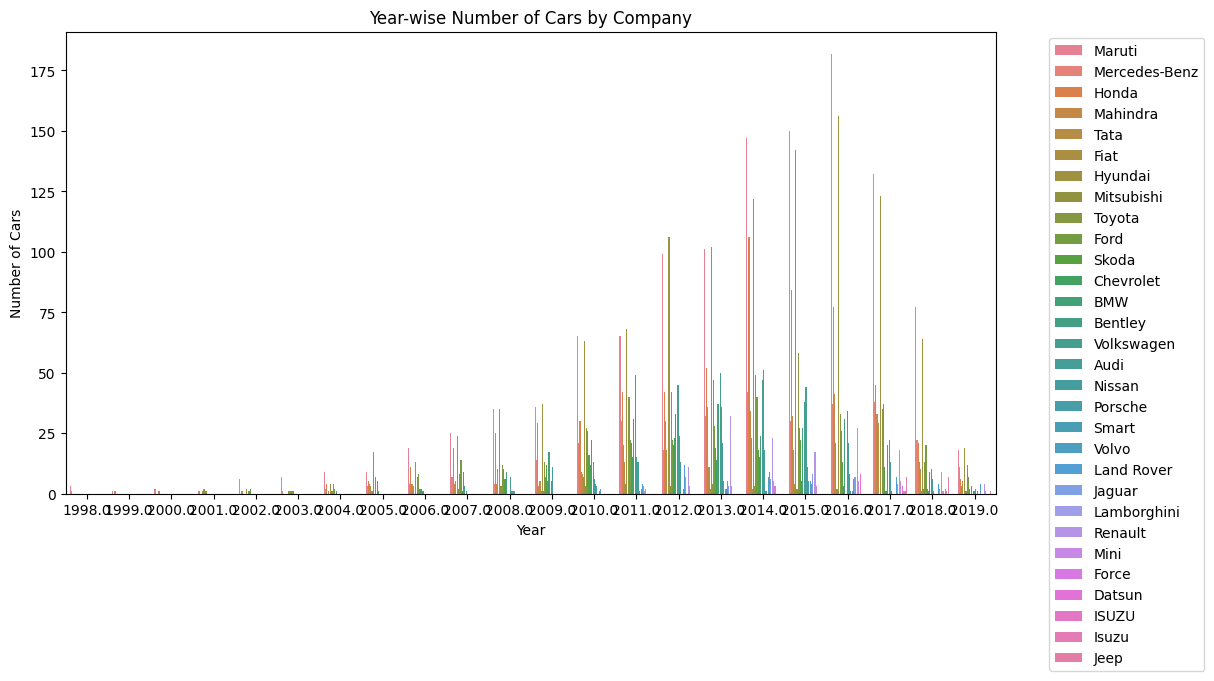

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(data=car_count,x='Year',y='Total_Cars',hue='Company_Name')
plt.title('Year-wise Number of Cars by Company')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()